<a href="https://colab.research.google.com/github/tanmey007/Spark_Foundation/blob/master/Spark_Foundation_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries imported

In [13]:
import numpy as np
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import shapefile as shp

# Uploading Dataset

In [14]:
uploaded=files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (4).csv


In [15]:
superstore=pd.read_csv('SampleSuperstore.csv')

# Profile report

This is an awesome library which provides insights to dataset, such as it can show statstics of dataset, provides graphs, correlation between dataset, find duplicate values.

To view this file uncomment the !pip install pandas-profiling==2.7.1 command

In [16]:
 !pip install pandas-profiling==2.7.1
from pandas_profiling import ProfileReport

In [17]:
report=ProfileReport(superstore)

In [18]:
report.to_file('superstore_report.html')

In [19]:
files.download('superstore_report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Document file on Loss making sectors

In [20]:
loss=superstore.loc[superstore['Profit'] <0]

In [21]:
L=[]
L.append('Loss Making Areas of superstore')
L.append('\n')
L.append('\n')
L.append('\n')
L.append('\n')
for index in loss.index:
  rowData = superstore.loc[ index , : ].values
  L.append(u'\u2022'+" Address: " + rowData[2]+ ", "+rowData[6] +" region, "+ rowData[4]+ " state, " +rowData[3]+ " postal code "+str(rowData[5])
  +" .We are delivery through " + rowData[0]+".")
  L.append('\n')
  L.append("* "+ rowData[1] +" segment. Category: "+rowData[7] +". Subcategory: " + rowData[8])
  L.append('\n')
  L.append("* Total sales: "+ str(rowData[9])+ " Quantity sold: " +str(rowData[10]) +" Discount provided: " + str(rowData[11])+ " Loss: "+ str(rowData[12]))
  L.append('\n')
  L.append('\n')

In [22]:
with open('superstore_loss_report.doc','w+') as out:
  out.writelines(L)

In [23]:
files.download('superstore_loss_report.doc')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualisation

## Level 1 analysis

In [24]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


We don't have missing value

In [25]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Bar graphs

In [26]:
%matplotlib inline

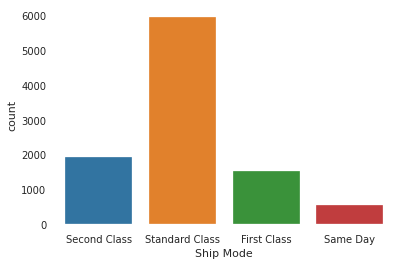

In [27]:
sns.countplot(x='Ship Mode',data=superstore)

In [28]:
superstore['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

We are using standard class for most of the deliveries.


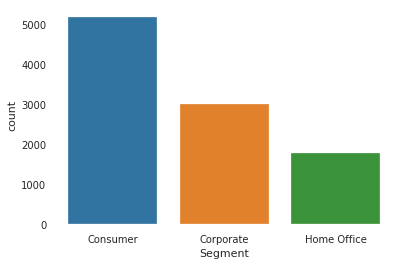

In [29]:
sns.countplot(x='Segment',data=superstore)

In [30]:
superstore['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

We are mostly dealing in consumer segment

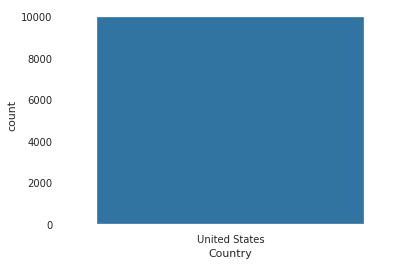

In [31]:
sns.countplot(x='Country',data=superstore)

We are only dealing in US

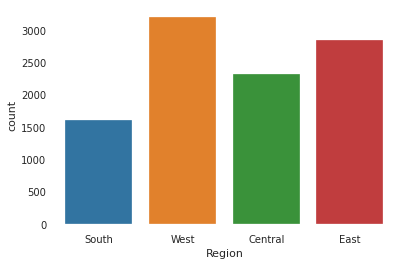

In [32]:
sns.countplot(x='Region',data=superstore)

In [33]:
superstore['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

Our consumer base is strong in Western region, followed by east region

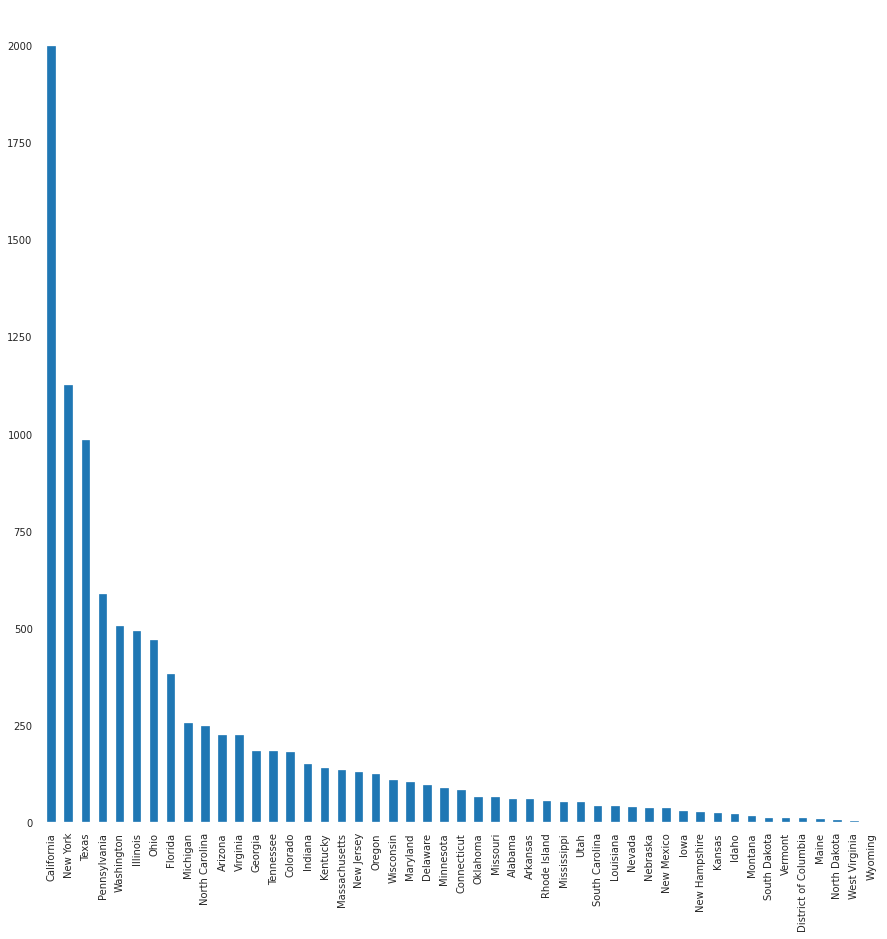

In [34]:
superstore['State'].value_counts().plot(kind='bar',figsize=(15,15))

We seem to be dealing alot in California state

In [35]:
superstore['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Redwood City       1
Hagerstown         1
Springdale         1
Melbourne          1
Antioch            1
Name: City, Length: 531, dtype: int64

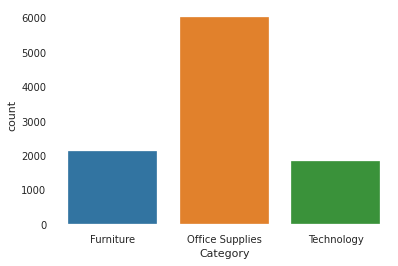

In [36]:
sns.countplot(x='Category',data=superstore)

We are dealing in office supplies alot as compared to other categories

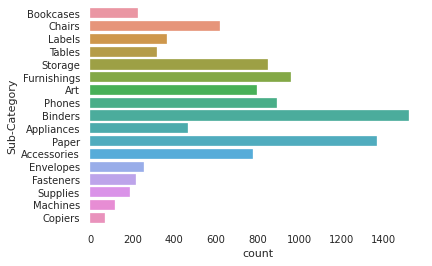

In [37]:
sns.countplot(y='Sub-Category',data=superstore)

We are dealing in Binders, Paper mostly which is sub category of office supplies

In [38]:
superstore['Postal Code'].nunique()

631

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c707e5e10>,
      dtype=object)

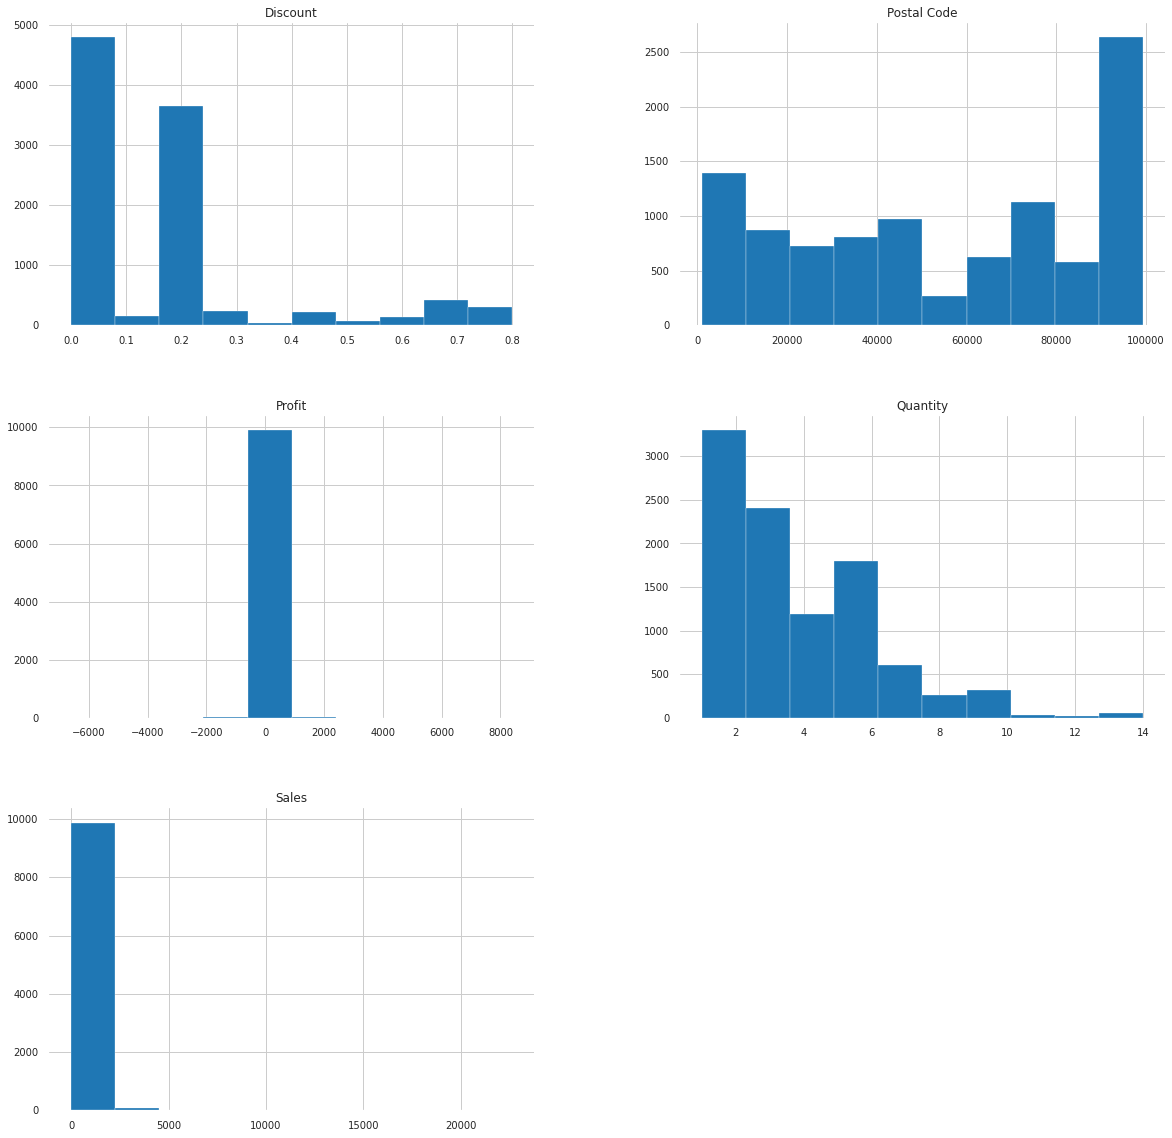

In [39]:
superstore.hist(figsize=(20,20))

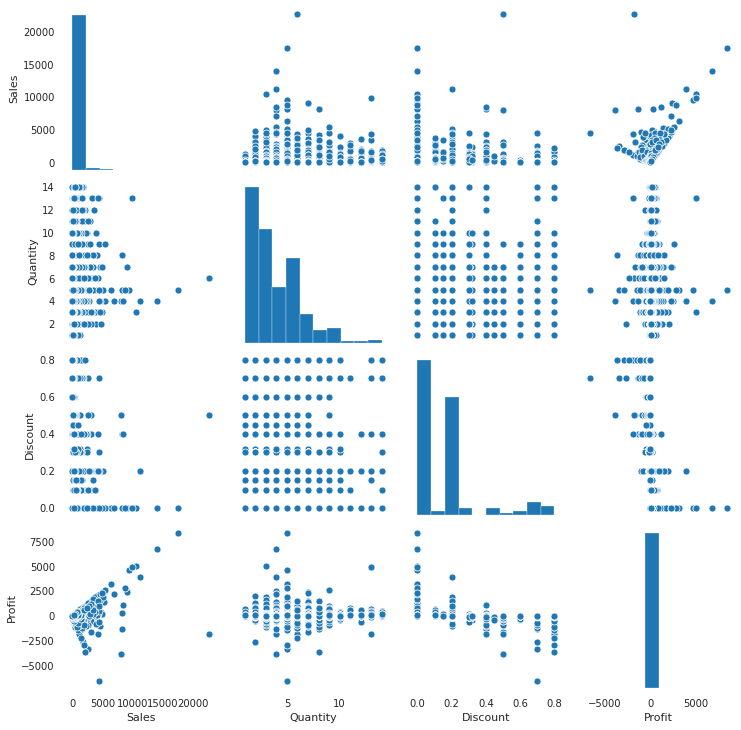

In [40]:
num_attributes=['Sales','Quantity','Discount','Profit']
sns.pairplot(superstore[num_attributes])

### HeatMap

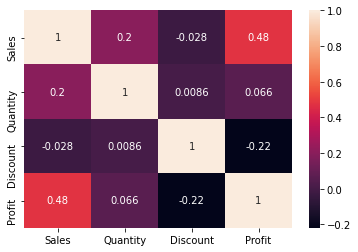

In [41]:
sns.reset_orig()
superstore_num=superstore[["Sales","Quantity","Discount","Profit"]]
sns.heatmap(superstore_num.corr(),annot=True)

### Ship mode wise analysis

In [42]:
sum_df_sm = superstore.groupby(['Ship Mode']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})
sum_df_sm['Ship Mode']=sum_df_sm.index
(x,y)=sum_df_sm.shape
sub_index=[]
for i in range(0,x):
  sub_index.append(i)
sum_df_sm.index=sub_index

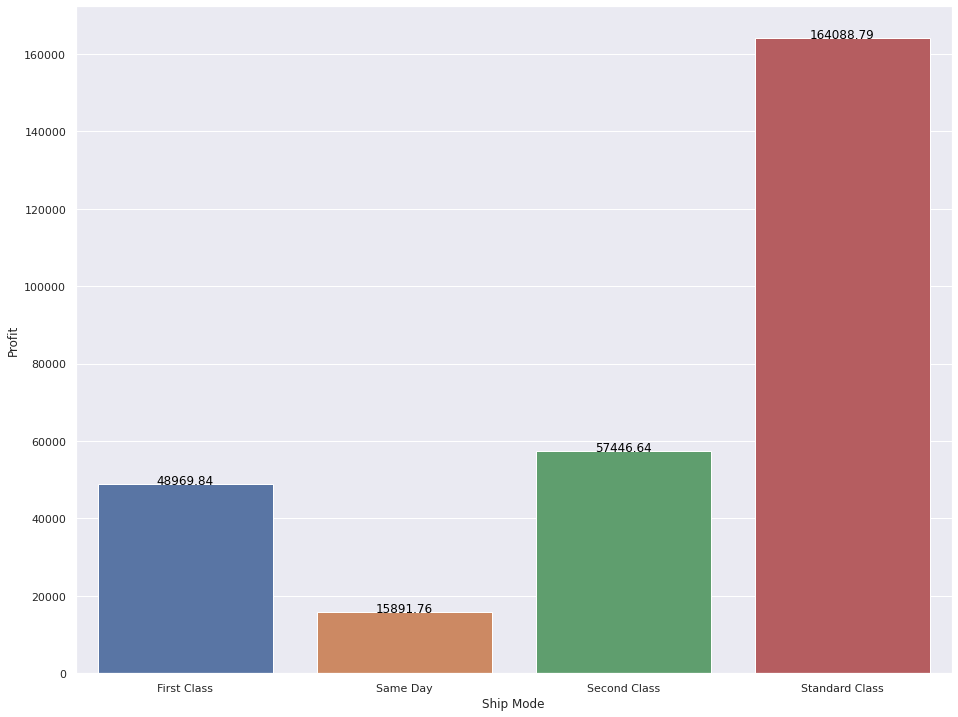

In [43]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
g=sns.barplot(x='Ship Mode',y='Profit',data=sum_df_sm)
for index, row in sum_df_sm.iterrows():
    g.text(row.name,row.Profit, round(row.Profit,2), color='black', ha="center")

Standard class is most profitable, followed by second class, first class. 

Same day is least profitable

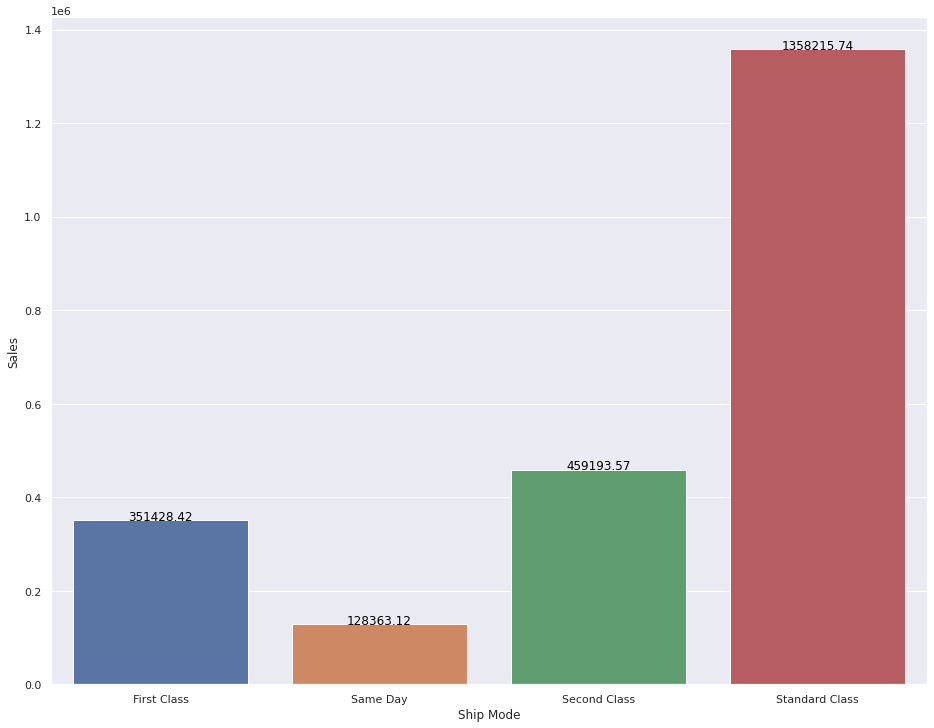

In [44]:
g=sns.barplot(x='Ship Mode',y='Sales',data=sum_df_sm)
for index, row in sum_df_sm.iterrows():
    g.text(row.name,row.Sales, round(row.Sales,2), color='black', ha="center")

Similar trend in sales as that of profit

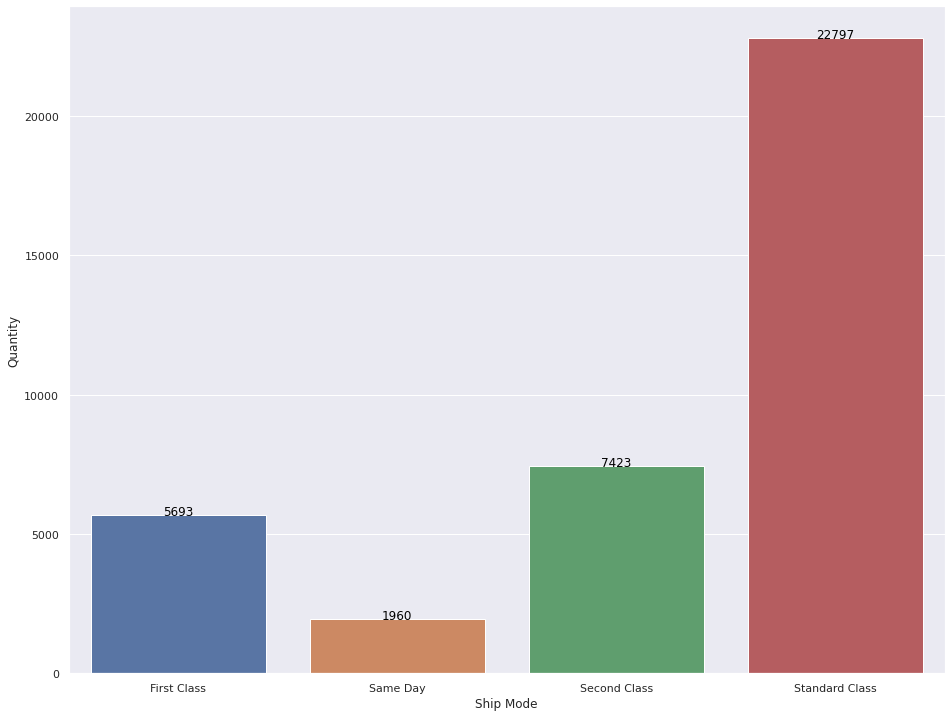

In [45]:
g=sns.barplot(x='Ship Mode',y='Quantity',data=sum_df_sm)
for index, row in sum_df_sm.iterrows():
    g.text(row.name,row.Quantity, round(row.Quantity,2), color='black', ha="center")

Similar trend in Quantity as that of profit

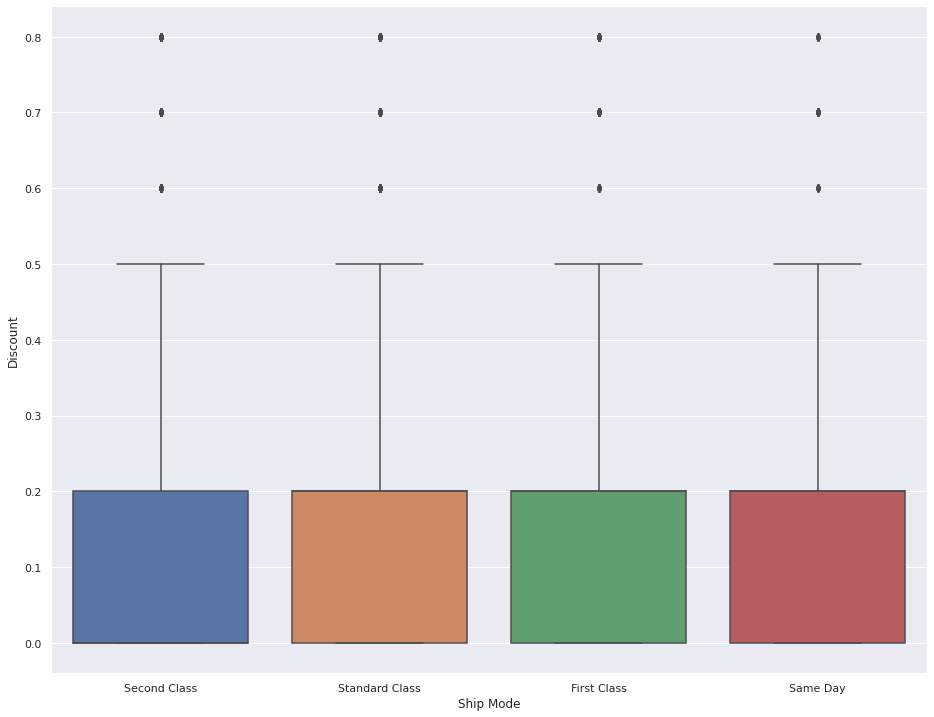

In [46]:
sns.boxplot(x='Ship Mode',y='Discount',data=superstore)

No difference in distribution of discount among various ship modes

### Segment wise analysis

In [47]:
sum_df_seg = superstore.groupby(['Segment']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})
sum_df_seg['Segment']=sum_df_seg.index
(x,y)=sum_df_seg.shape
sub_index=[]
for i in range(0,x):
  sub_index.append(i)
sum_df_seg.index=sub_index

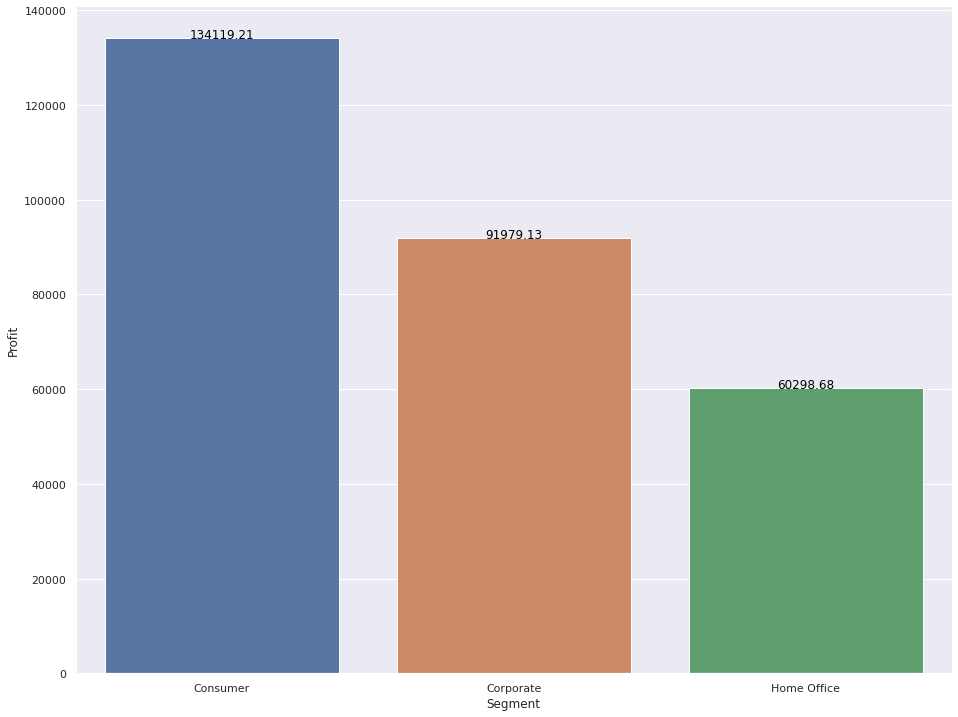

In [48]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
g=sns.barplot(x='Segment',y='Profit',data=sum_df_seg)
for index, row in sum_df_seg.iterrows():
    g.text(row.name,row.Profit, round(row.Profit,2), color='black', ha="center")

Consumer segment is most profitable to superstore, followed by corporate category then at last home office

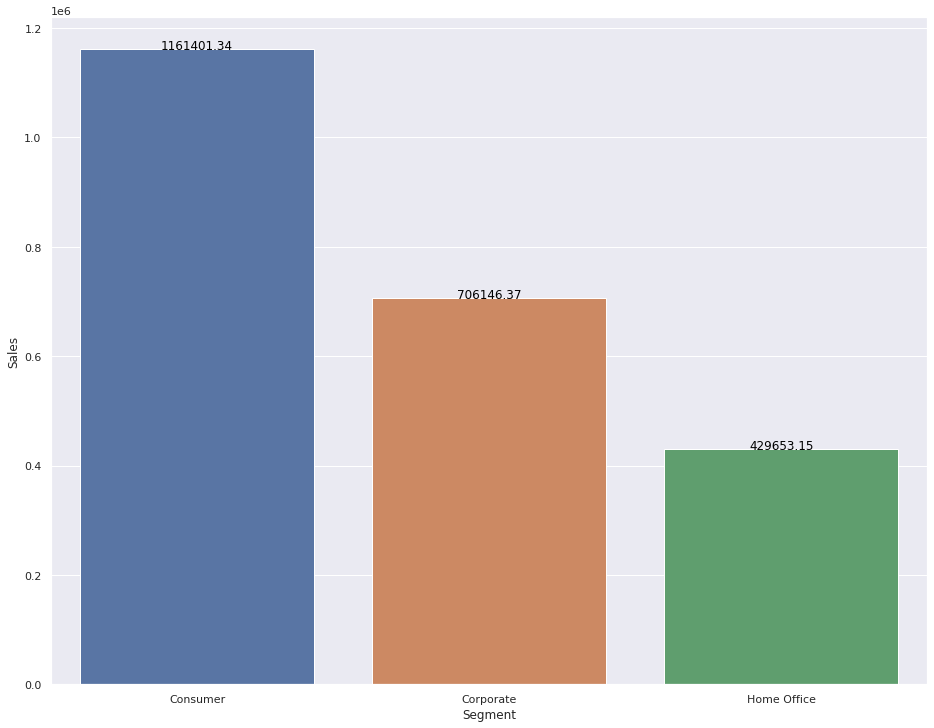

In [49]:
g=sns.barplot(x='Segment',y='Sales',data=sum_df_seg)
for index, row in sum_df_seg.iterrows():
    g.text(row.name,row.Sales, round(row.Sales,2), color='black', ha="center")

Similar trend in sales as that of profit

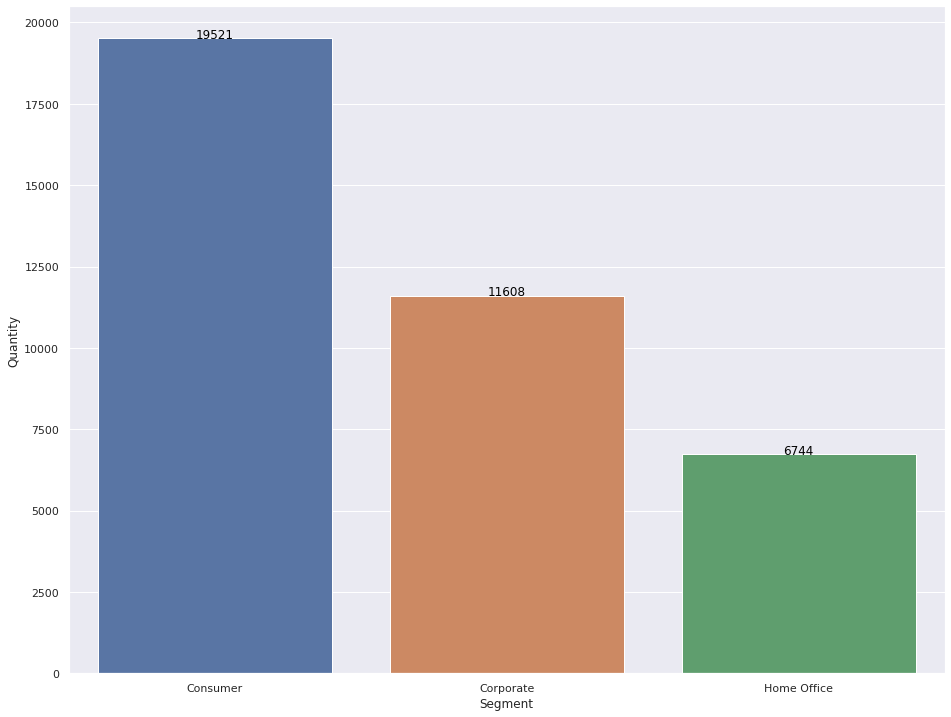

In [50]:
g=sns.barplot(x='Segment',y='Quantity',data=sum_df_seg)
for index, row in sum_df_seg.iterrows():
    g.text(row.name,row.Quantity, round(row.Quantity,2), color='black', ha="center")

Similar trend in Quantity as that of profit

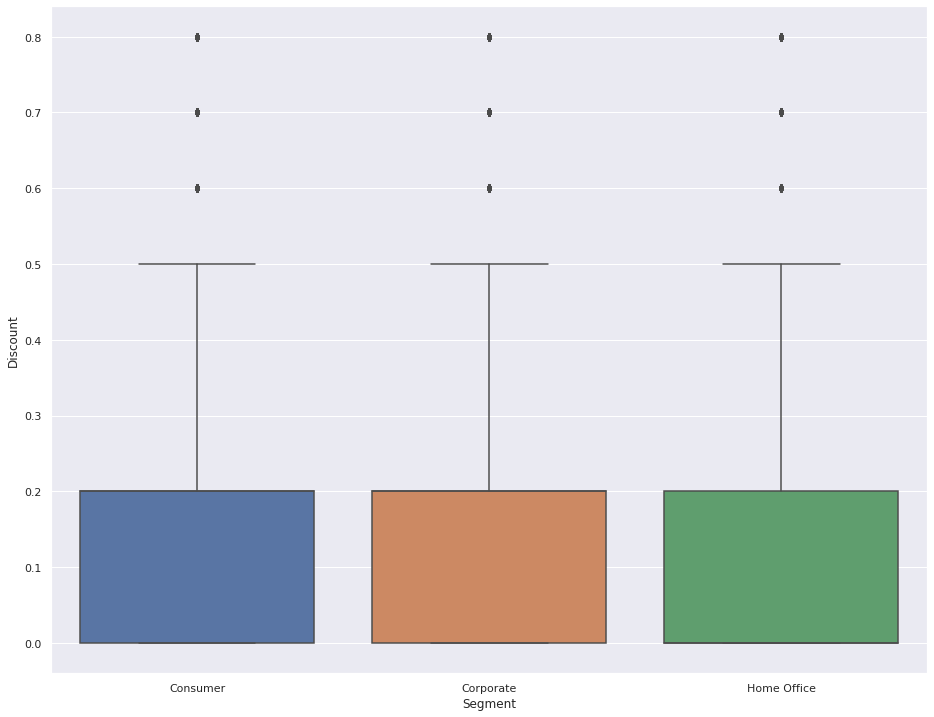

In [51]:
sns.boxplot(x='Segment',y='Discount',data=superstore)

No difference in distribution of discount among various segments

### Region wise analysis

In [52]:
sum_df_reg = superstore.groupby(['Region']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})
sum_df_reg['Region']=sum_df_reg.index
(x,y)=sum_df_reg.shape
sub_index=[]
for i in range(0,x):
  sub_index.append(i)
sum_df_reg.index=sub_index

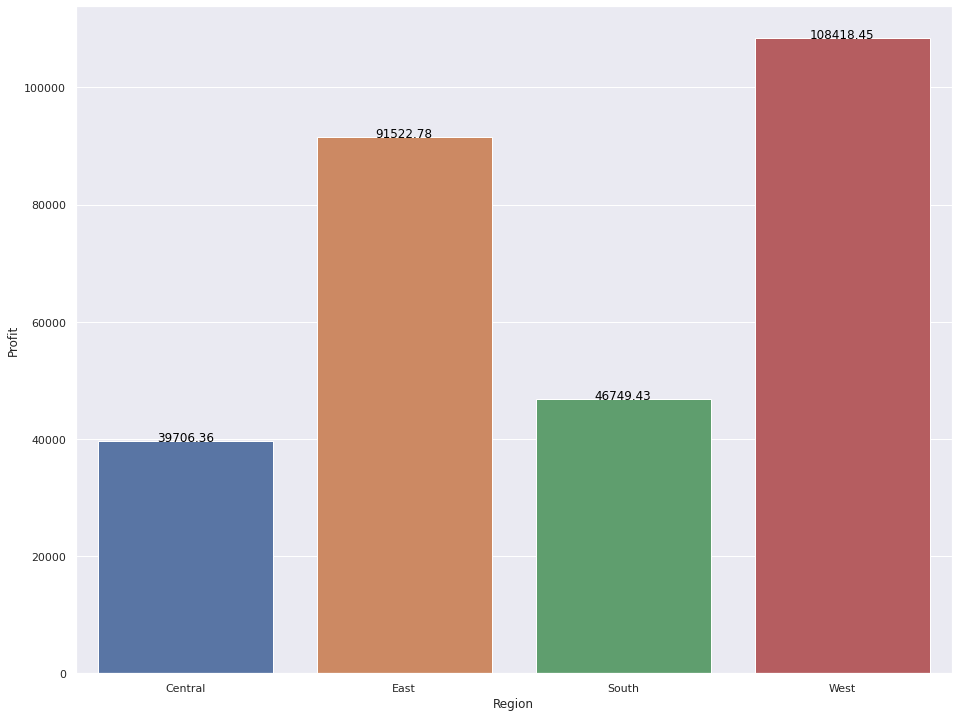

In [53]:
g=sns.barplot(x='Region',y='Profit',data=sum_df_reg)
for index, row in sum_df_reg.iterrows():
    g.text(row.name,row.Profit, round(row.Profit,2), color='black', ha="center")

West region has the highest profit followed by eastern region then south and last is central

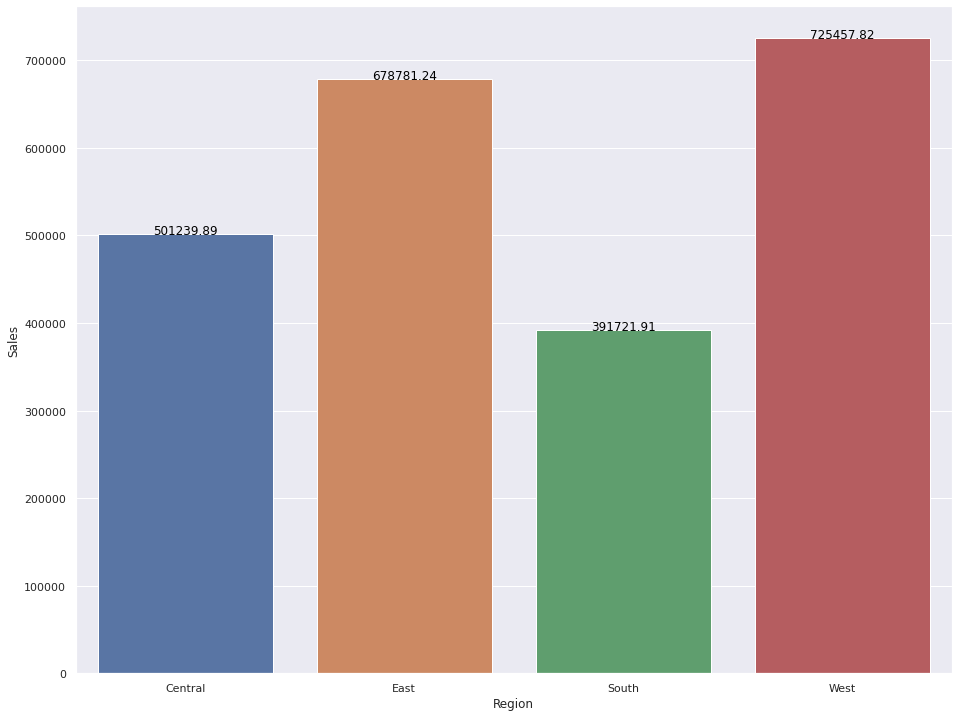

In [54]:
g=sns.barplot(x='Region',y='Sales',data=sum_df_reg)
for index, row in sum_df_reg.iterrows():
    g.text(row.name,row.Sales, round(row.Sales,2), color='black', ha="center")

West leads in sales which is expected as profits are highest in west followed by east but interestingly central region has more sales than south region but profits of south region is more than central so this indicates there is something wrong with central region

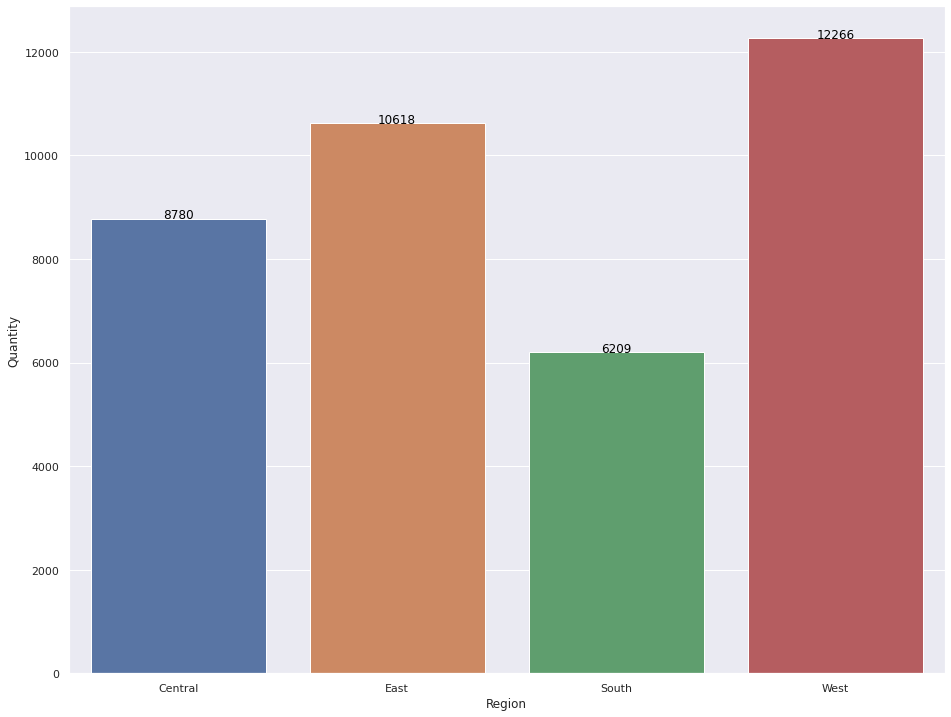

In [55]:
g=sns.barplot(x='Region',y='Quantity',data=sum_df_reg)
for index, row in sum_df_reg.iterrows():
    g.text(row.name,row.Quantity, round(row.Quantity,2), color='black', ha="center")

As obvious West sold more items than rest of the regions, then order is similar to sales

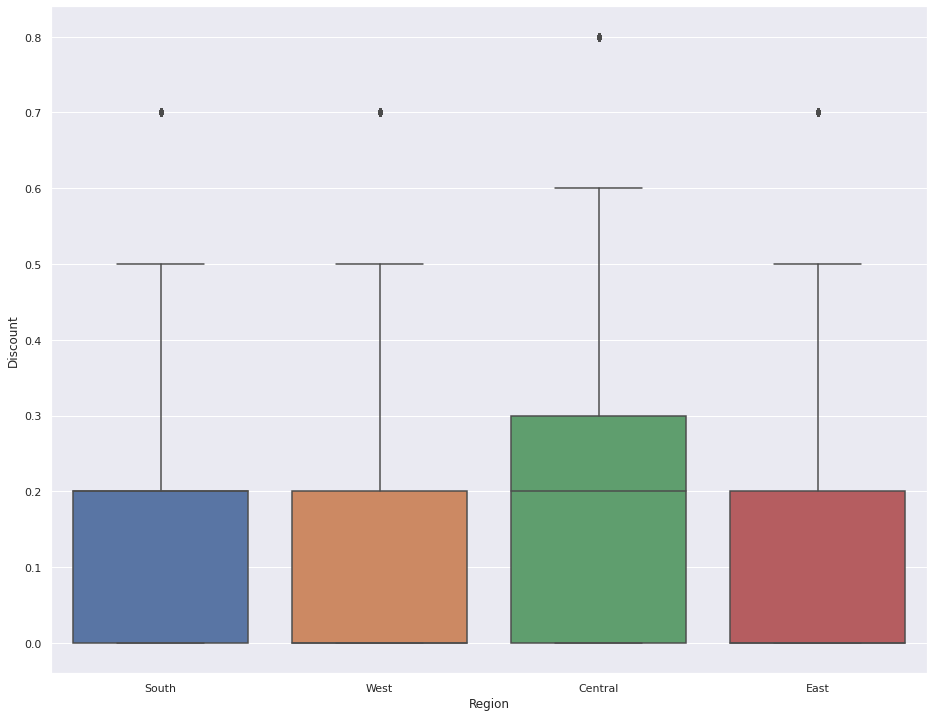

In [56]:
sns.boxplot(x='Region',y='Discount',data=superstore)

Central region is being offered more discount than other

### Sub-Category analysis

In [57]:
sum_df_sub = superstore.groupby(['Sub-Category']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})
sum_df_sub['Sub-Category']=sum_df_sub.index
(x,y)=sum_df_sub.shape
sub_index=[]
for i in range(0,x):
  sub_index.append(i)
sum_df_sub.index=sub_index

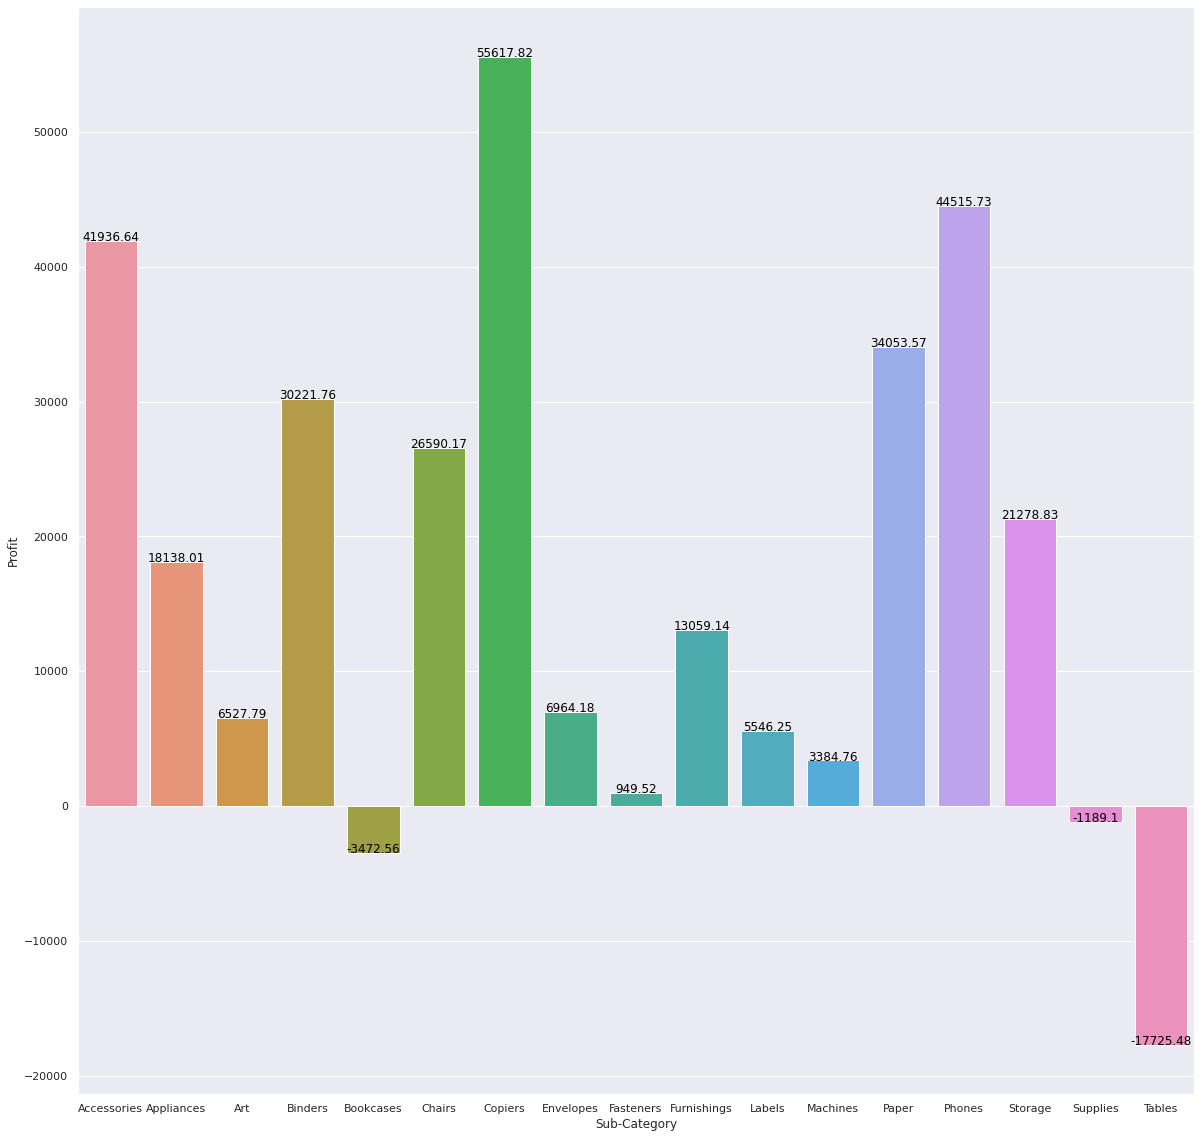

In [58]:
sns.set(rc={'figure.figsize':(20,20)})
g=sns.barplot(x='Sub-Category',y='Profit',data=sum_df_sub)
for index, row in sum_df_sub.iterrows():
    g.text(row.name,row.Profit, round(row.Profit,2), color='black', ha="center")

Copiers and phones are the most profitable sub category
Bookcases, supplies and tables have losses, rest of sub categories are profitable

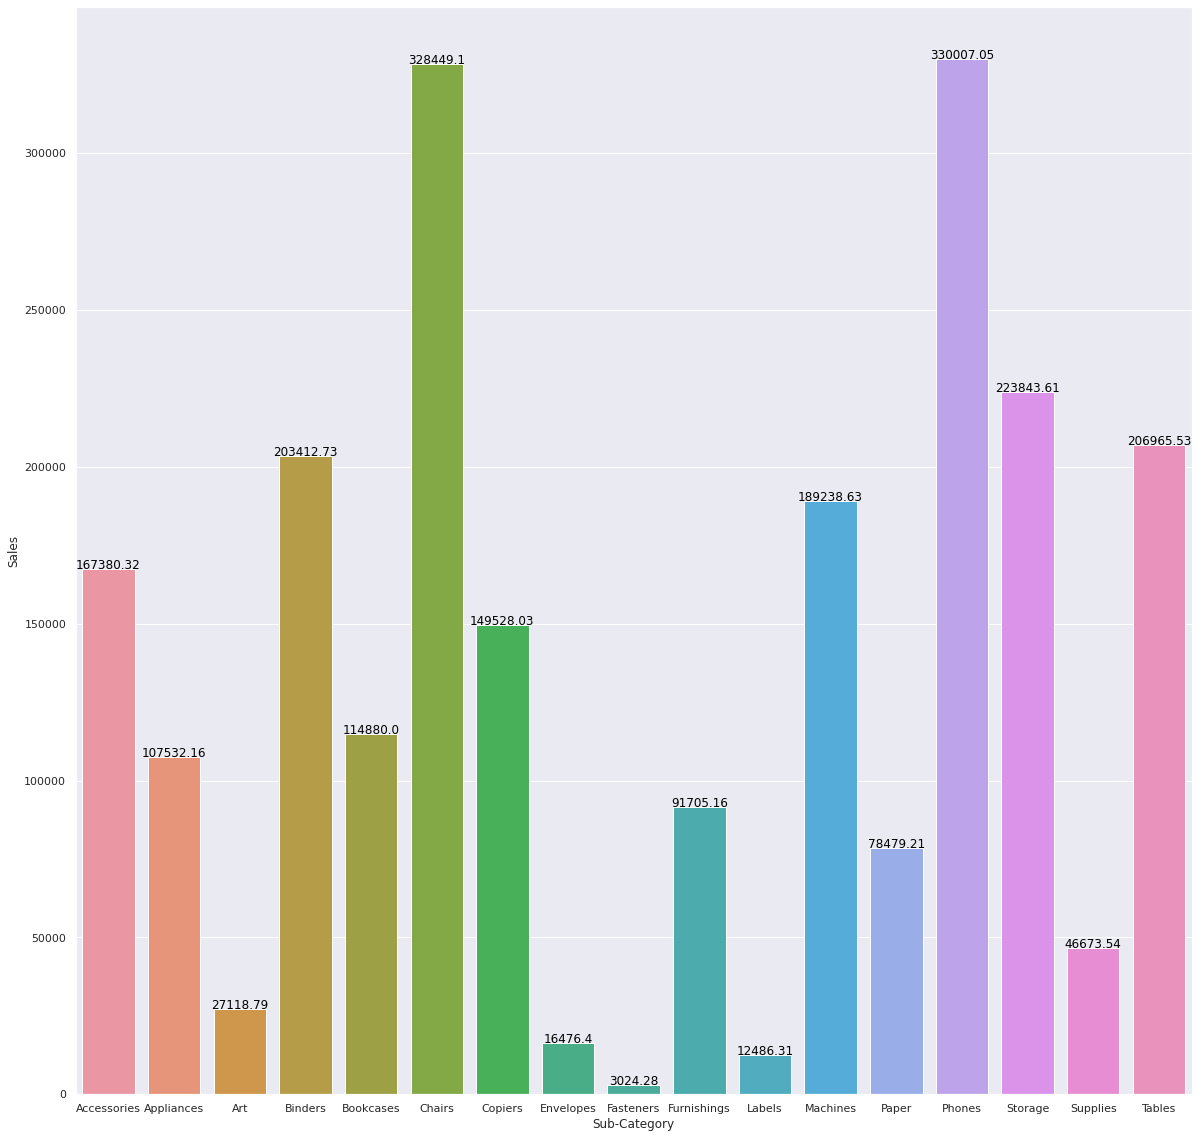

In [59]:
sns.set(rc={'figure.figsize':(20,20)})
g=sns.barplot(x='Sub-Category',y='Sales',data=sum_df_sub)
for index, row in sum_df_sub.iterrows():
    g.text(row.name,row.Sales, round(row.Sales,2), color='black', ha="center")

Chairs and Phones have maximum sales
Interesting observation tables seems to have more sales than copiers which is more profitable than tables 
Bookcases also has decent sales

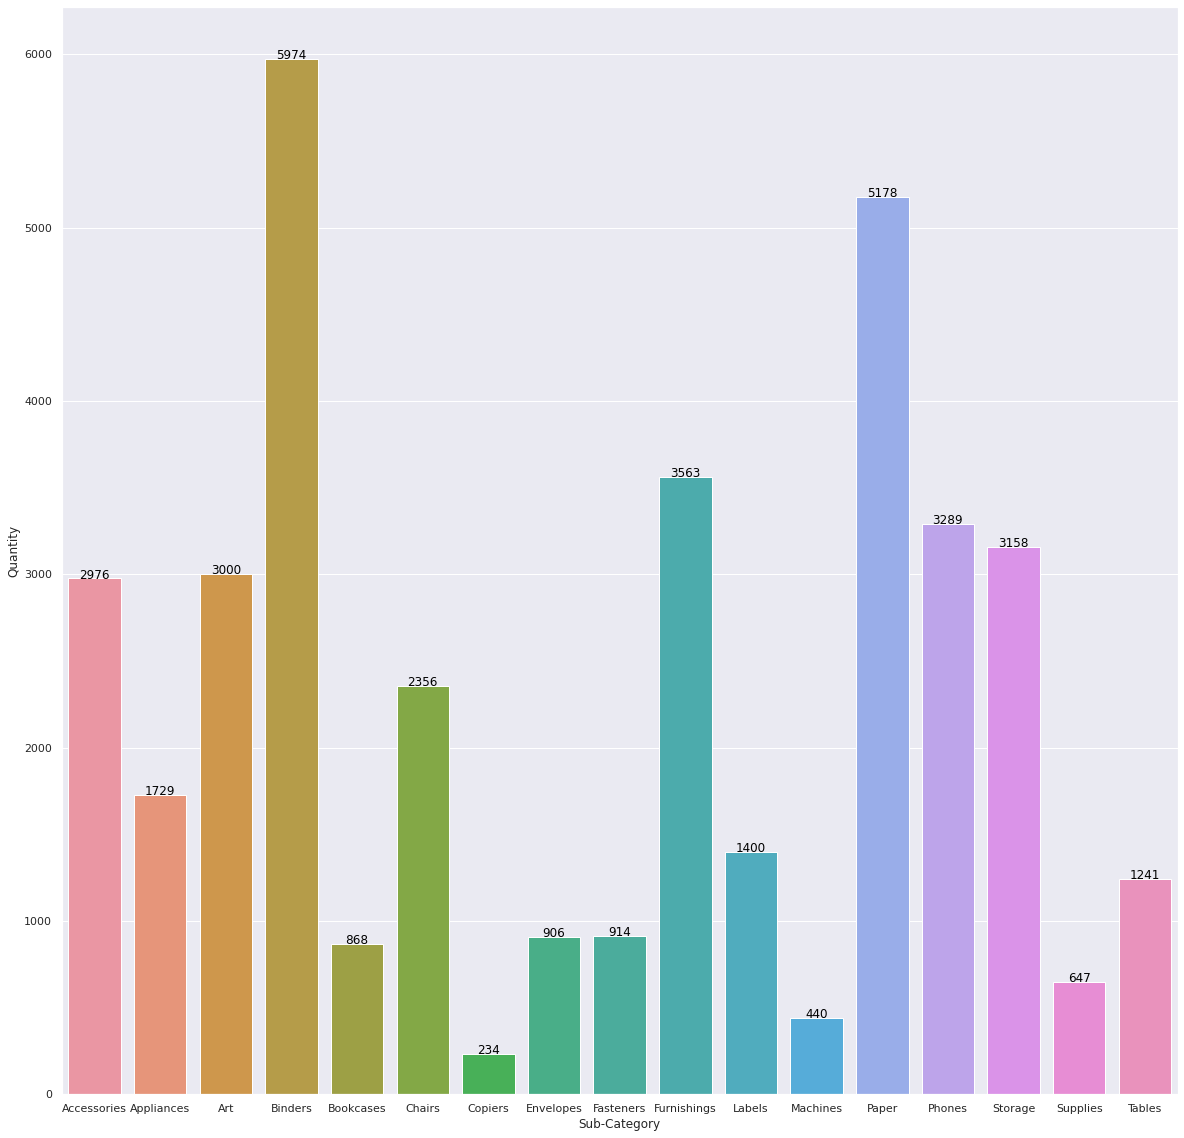

In [60]:
sns.set(rc={'figure.figsize':(20,20)})
g=sns.barplot(x='Sub-Category',y='Quantity',data=sum_df_sub)
for index, row in sum_df_sub.iterrows():
    g.text(row.name,row.Quantity, round(row.Quantity,2), color='black', ha="center")

Binders is the most sold item

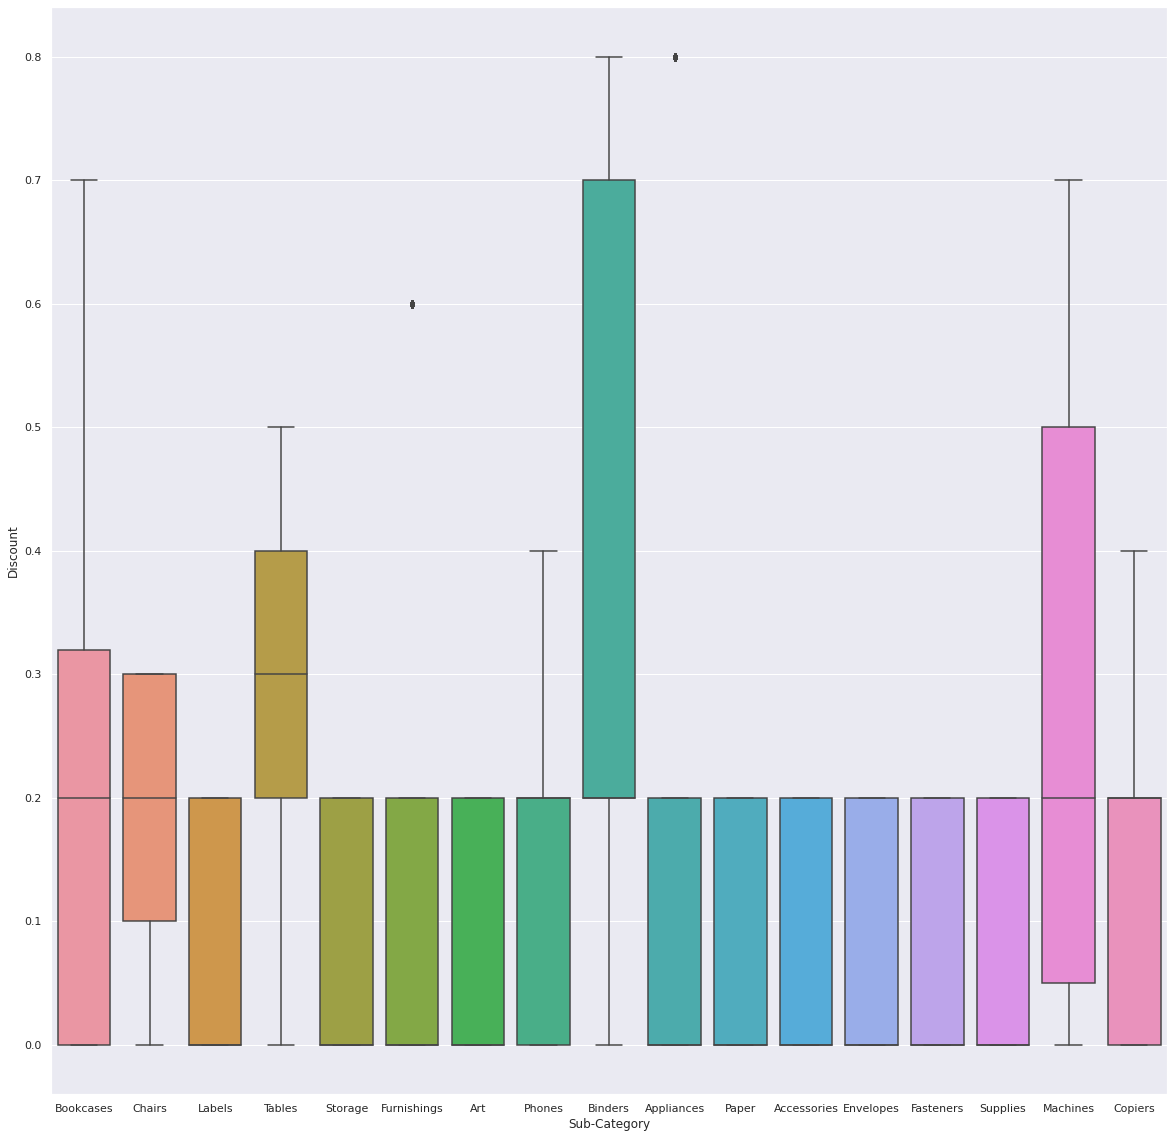

In [61]:
sns.boxplot(x='Sub-Category',y='Discount',data=superstore)

Higher discount is offered on Tables than copiers 
High discounts are there in bookcases subcategories
Storage, art, paper, accessories, envelopes, fasteners, supplies ( which is also loss making sub category) has same distribution of discount
Binders which is most sold item also has high discounts
Machines also has higher discounts as compared to rest

### State wise analysis

In [62]:
sum_df_sta = superstore.groupby(['State']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})
sum_df_sta['State']=sum_df_sta.index
(x,y)=sum_df_sta.shape
sub_index=[]
for i in range(0,x):
  sub_index.append(i)
sum_df_sta.index=sub_index

In [63]:
loss_state=sum_df_sta.loc[ sum_df_sta['Profit']<0]
loss_state.sort_values(by=['Profit'])

,Profit,Sales,Quantity,State
41,-25729.3563,170188.0458,3724,Texas
33,-16971.3766,78258.1360,1759,Ohio
36,-15559.9603,116511.9140,2153,Pennsylvania
11,-12607.8870,80166.1010,1845,Illinois
31,-7490.9122,55603.1640,983,North Carolina
4,-6527.8579,32108.1180,693,Colorado
40,-5341.6936,30661.8730,681,Tennessee
1,-3427.9246,35282.0010,862,Arizona
8,-3399.3017,89473.7080,1379,Florida
35,-1190.4705,17431.1500,499,Oregon


In [64]:
state_dict=pd.Series(sum_df_sta.Profit.values,index=sum_df_sta.State).to_dict()

In [65]:
state_dict

{'Alabama': 5786.825299999999,
 'Arizona': -3427.9246000000003,
 'Arkansas': 4008.6871,
 'California': 76381.38710000017,
 'Colorado': -6527.8579,
 'Connecticut': 3511.4918000000002,
 'Delaware': 9977.374800000001,
 'District of Columbia': 1059.5892999999999,
 'Florida': -3399.3017,
 'Georgia': 16250.043300000003,
 'Idaho': 826.7230999999999,
 'Illinois': -12607.88699999998,
 'Indiana': 18382.936300000005,
 'Iowa': 1183.8119000000002,
 'Kansas': 836.4435000000001,
 'Kentucky': 11199.696600000005,
 'Louisiana': 2196.102300000001,
 'Maine': 454.4862,
 'Maryland': 7031.178799999997,
 'Massachusetts': 6785.501600000005,
 'Michigan': 24463.187599999994,
 'Minnesota': 10823.1874,
 'Mississippi': 3172.9761999999982,
 'Missouri': 6436.210499999999,
 'Montana': 1833.3285,
 'Nebraska': 2037.0942000000007,
 'Nevada': 3316.7659,
 'New Hampshire': 1706.5028,
 'New Jersey': 9772.9138,
 'New Mexico': 1157.1161,
 'New York': 74038.54860000005,
 'North Carolina': -7490.912200000003,
 'North Dakota': 23

In [66]:
profit_state=sum_df_sta.loc[ sum_df_sta['Profit']>=0]
P10 = profit_state['Profit'].quantile(0.1)
critical_states=profit_state.loc[profit_state['Profit']<=P10]
critical_states.sort_values(by=['Profit'])

,Profit,Sales,Quantity,State
48,100.1960,1603.136,4,Wyoming
46,185.9216,1209.824,18,West Virginia
32,230.1497,919.910,30,North Dakota
39,394.8283,1315.560,42,South Dakota


### City wise analysis

In [67]:
sum_df_cty = superstore.groupby(['City']).agg({'Profit': 'sum'})
sum_df_cty['City']=sum_df_cty.index
(x,y)=sum_df_cty.shape
sub_index=[]
for i in range(0,x):
  sub_index.append(i)
sum_df_cty.index=sub_index

In [68]:
loss_city=sum_df_cty.loc[sum_df_cty['Profit']<0]
loss_city.sort_values(by=['Profit'])

,Profit,City
374,-13837.7674,Philadelphia
207,-10153.5485,Houston
434,-7299.0502,San Antonio
241,-7239.0684,Lancaster
80,-6654.5688,Chicago
...,...,...
354,-1.9656,Ormond Beach
370,-1.4760,Pensacola
140,-1.3984,Elyria
7,-1.1835,Altoona


In [69]:
profit_city=sum_df_cty.loc[sum_df_cty['Profit']>=0]
profit_city.sort_values(by=['Profit'])

,Profit,City
221,0.1548,Jupiter
441,1.1946,San Luis Obispo
17,1.2348,Arlington Heights
463,1.4190,Springdale
200,1.5455,Hillsboro
...,...,...
123,13181.7908,Detroit
438,17507.3854,San Francisco
452,29156.0967,Seattle
266,30440.7579,Los Angeles


### Postal Code analysis

In [70]:
sum_df_pnc = superstore.groupby(['Postal Code']).agg({'Profit': 'sum'})
sum_df_pnc['Postal Code']=sum_df_pnc.index
(x,y)=sum_df_pnc.shape
sub_index=[]
for i in range(0,x):
  sub_index.append(i)
sum_df_pnc.index=sub_index

In [71]:
loss_pnc=sum_df_pnc.loc[sum_df_pnc['Profit']<0]
loss_pnc.sort_values(by=['Profit'])

,Profit,Postal Code
441,-7299.0502,78207
221,-7149.6180,43130
109,-5894.5269,27217
348,-5678.7982,60653
81,-5168.3905,19140
...,...,...
148,-1.9656,32174
151,-1.4760,32503
226,-1.3984,44035
73,-1.1835,16602


In [72]:
profit_pnc=sum_df_pnc.loc[sum_df_pnc['Profit']>=0]
profit_pnc.sort_values(by=['Profit'])

,Profit,Postal Code
177,0.1548,33458
337,1.0192,60302
569,1.1946,93405
323,1.2348,60004
585,1.3750,94568
...,...,...
53,10152.3901,10011
621,13303.8755,98115
52,13697.0019,10009
55,16533.8669,10035


## Level 2 analysis

### Region and Subcategory analysis

In [73]:
sum_df_rsc = superstore.groupby(['Region','Sub-Category']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})

In [74]:
sum_df_rsc['Region']=sum_df_rsc.index.get_level_values(0)
sum_df_rsc['Sub-Category']=sum_df_rsc.index.get_level_values(1)
(x,y)=sum_df_rsc.shape
rsc_index=[]
for i in range(0,x):
  rsc_index.append(i)
sum_df_rsc.index=rsc_index

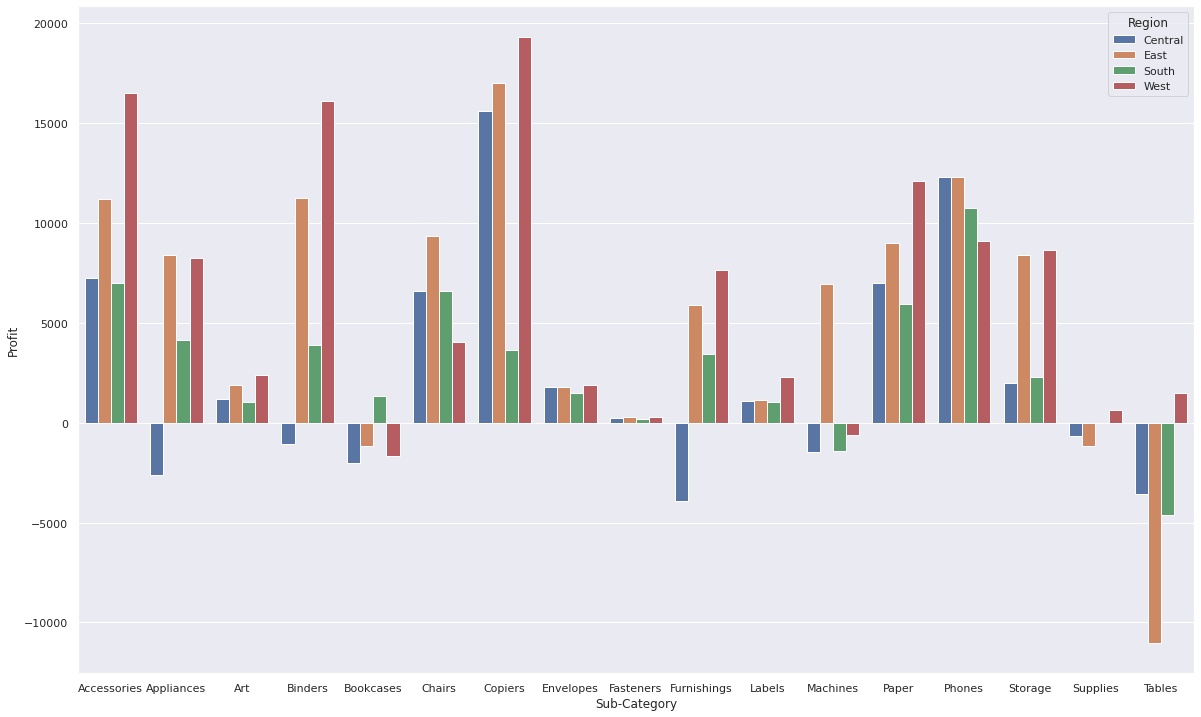

In [75]:
sns.set(rc={'figure.figsize':(20,12.27)})
sns.barplot(x='Sub-Category',y='Profit',hue='Region',data=sum_df_rsc)

In [76]:
sum_df_rsc.loc[sum_df_rsc['Sub-Category'] == 'Supplies']

,Profit,Sales,Quantity,Region,Sub-Category
15,-661.8881,9467.372,122,Central,Supplies
32,-1155.1352,10760.116,195,East,Supplies
49,1.8773,8318.928,92,South,Supplies
66,626.0465,18127.122,238,West,Supplies


South region is just positive in supplies sub categories(1.877)

Losses in Central region : Appliances, binders,bookcases, furnishings, machines, supplies,tables

East: Bookcases, suplies,tables

South: Machines, tables

West: Bookcases, Machines

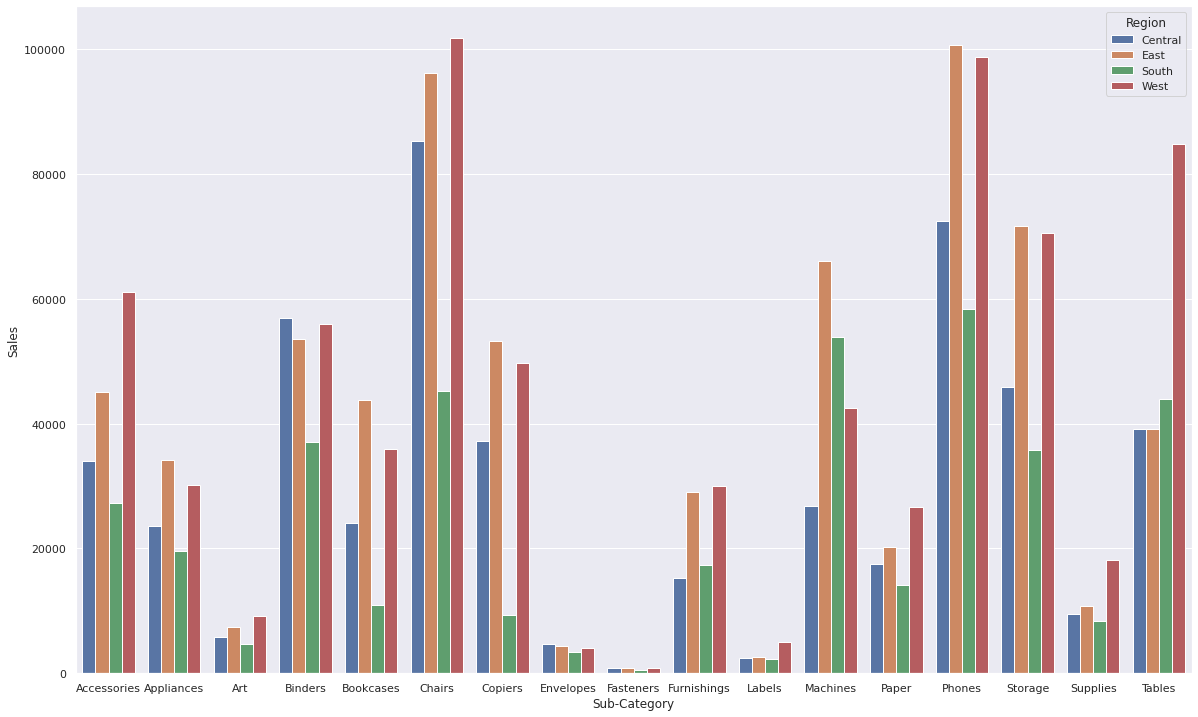

In [77]:
sns.barplot(x='Sub-Category',y='Sales',hue='Region',data=sum_df_rsc)

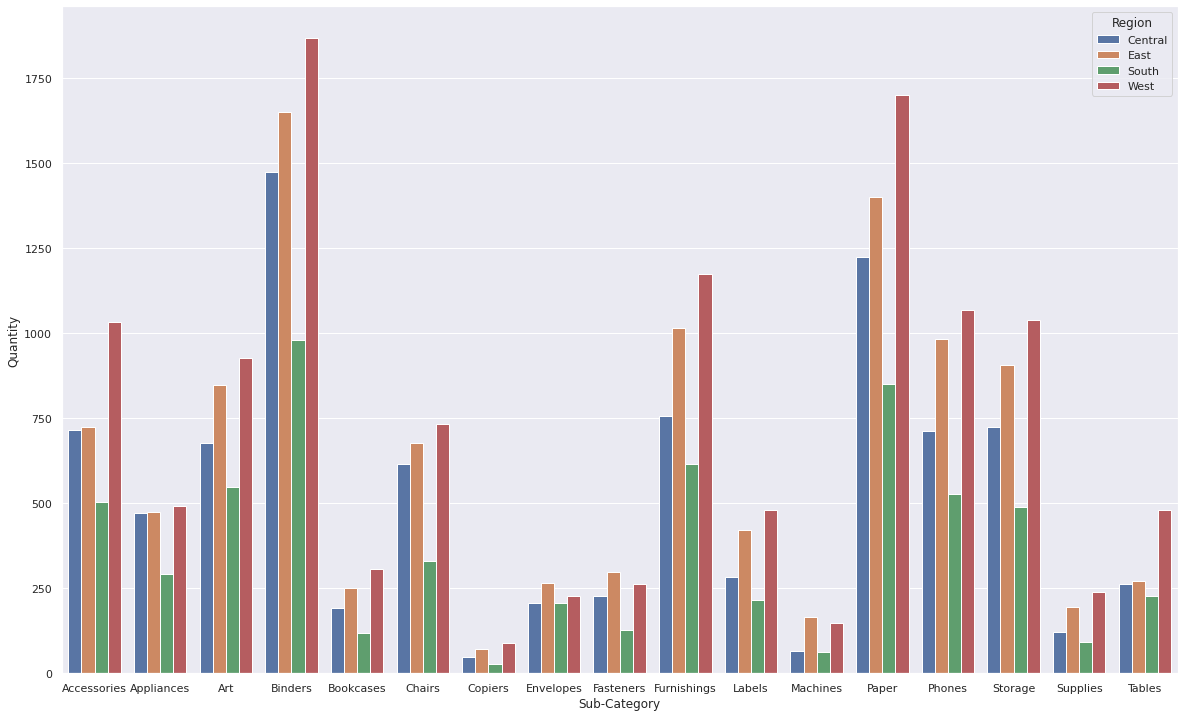

In [78]:
sns.barplot(x='Sub-Category',y='Quantity',hue='Region',data=sum_df_rsc)

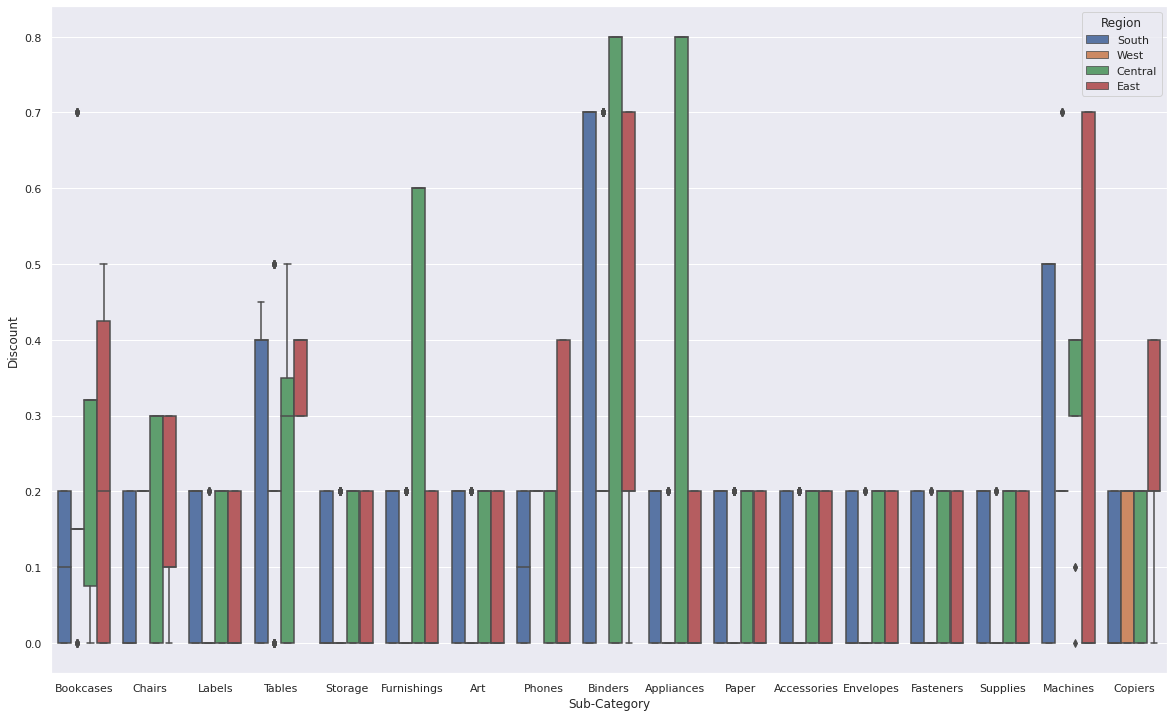

In [79]:
sns.boxplot(x='Sub-Category',y='Discount',hue='Region',data=superstore)

### Region and ShipMode analysis

In [80]:
sum_df_rsm = superstore.groupby(['Region','Ship Mode']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})

In [81]:
sum_df_rsm['Region']=sum_df_rsm.index.get_level_values(0)
sum_df_rsm['Ship Mode']=sum_df_rsm.index.get_level_values(1)
(x,y)=sum_df_rsm.shape
rsm_index=[]
for i in range(0,x):
  rsm_index.append(i)
sum_df_rsm.index=rsm_index

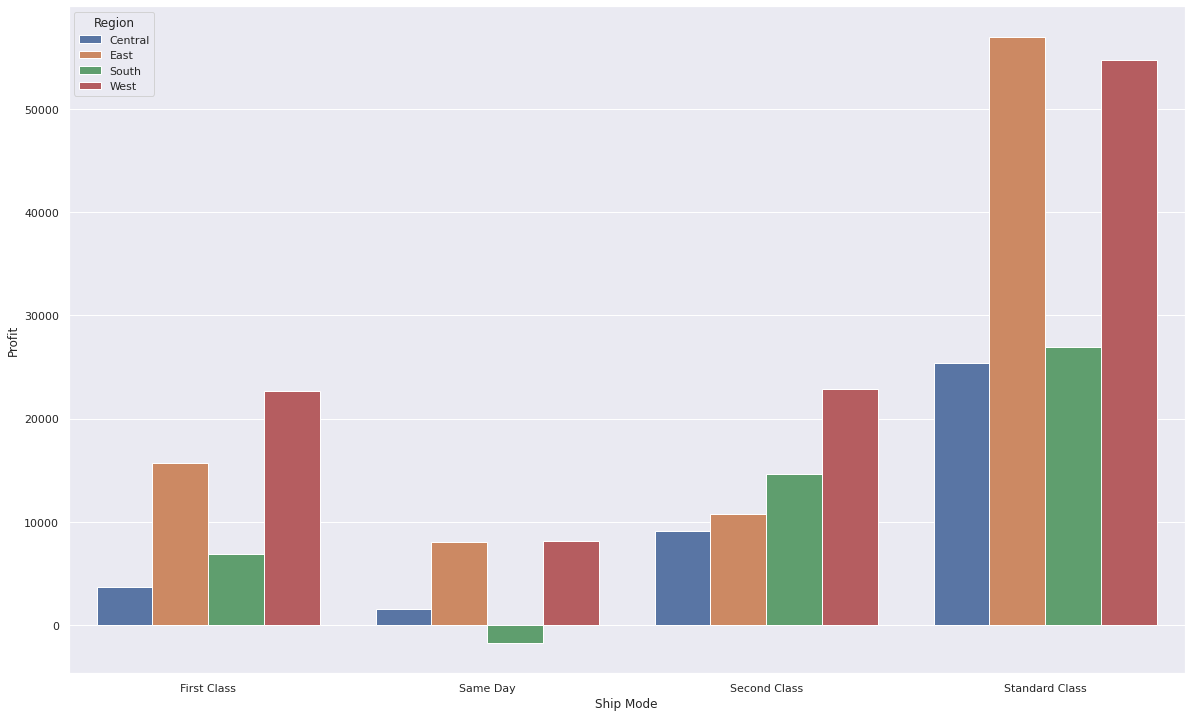

In [82]:
sns.set(rc={'figure.figsize':(20,12.27)})
sns.barplot(x='Ship Mode',y='Profit',hue='Region',data=sum_df_rsm)

Same day delivery mode in south region is loss making area

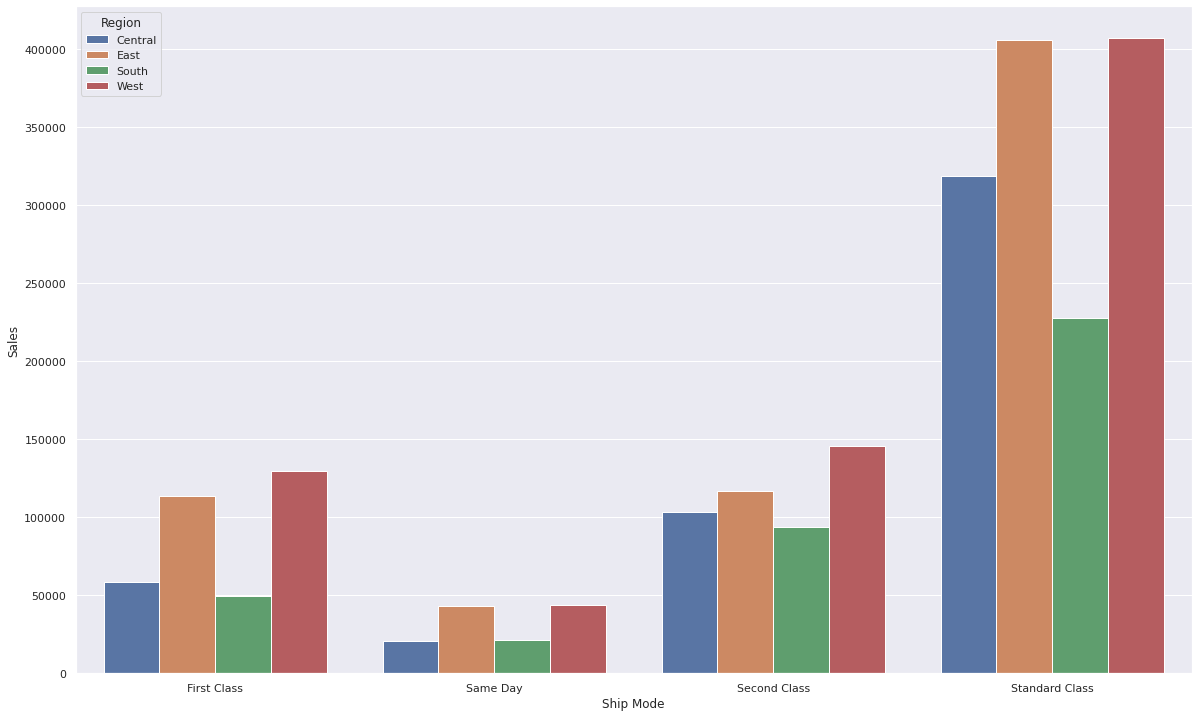

In [83]:
sns.barplot(x='Ship Mode',y='Sales',hue='Region',data=sum_df_rsm)

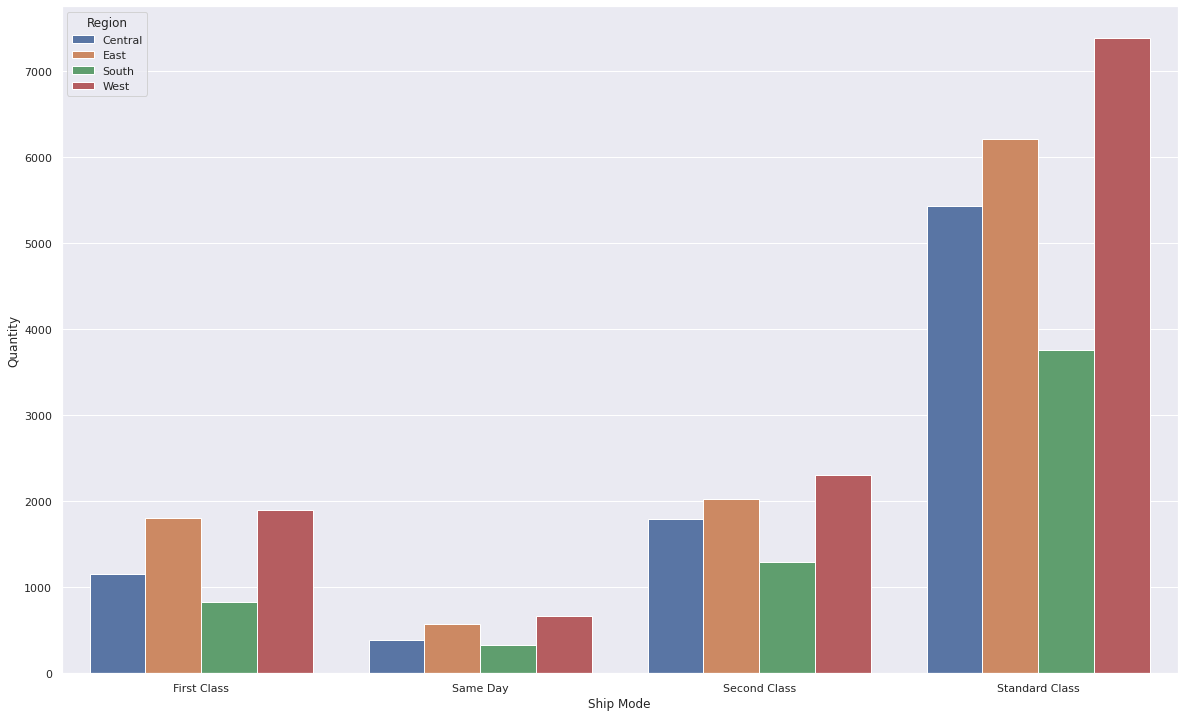

In [84]:
sns.barplot(x='Ship Mode',y='Quantity',hue='Region',data=sum_df_rsm)

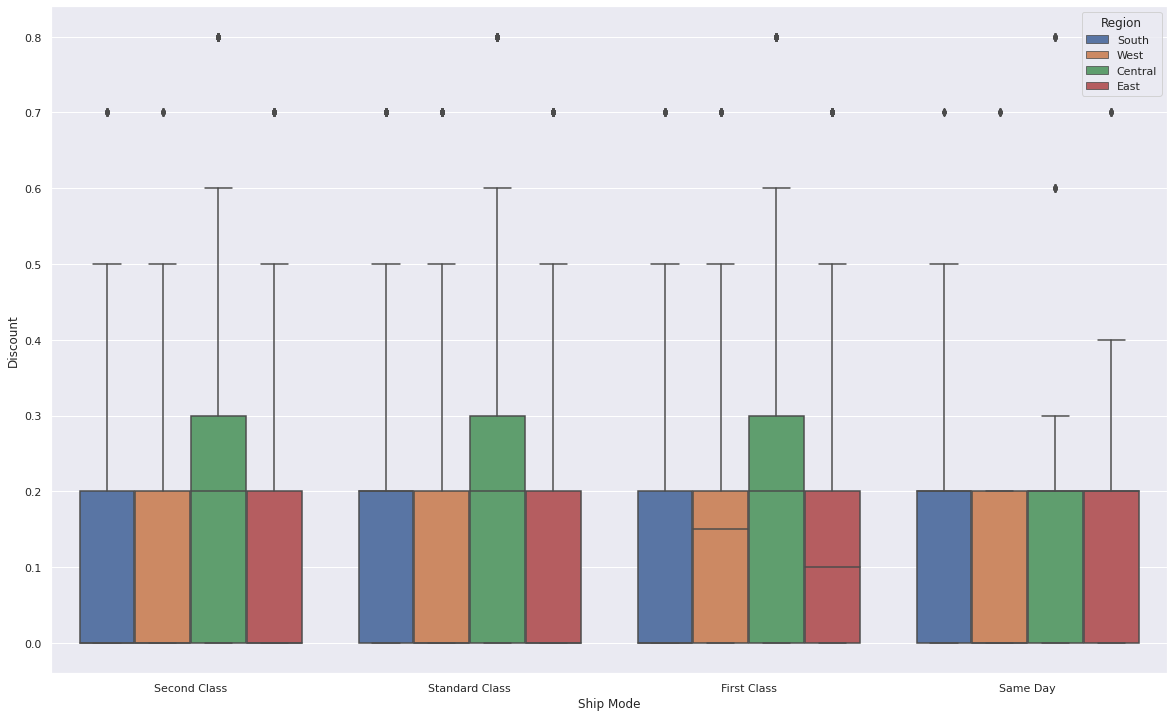

In [85]:
sns.boxplot(x='Ship Mode',y='Discount',hue='Region',data=superstore)

### Region and Segment analysis

In [86]:
sum_df_rse = superstore.groupby(['Region','Segment']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})

In [87]:
sum_df_rse['Region']=sum_df_rse.index.get_level_values(0)
sum_df_rse['Segment']=sum_df_rse.index.get_level_values(1)
(x,y)=sum_df_rse.shape
rse_index=[]
for i in range(0,x):
  rse_index.append(i)
sum_df_rse.index=rse_index

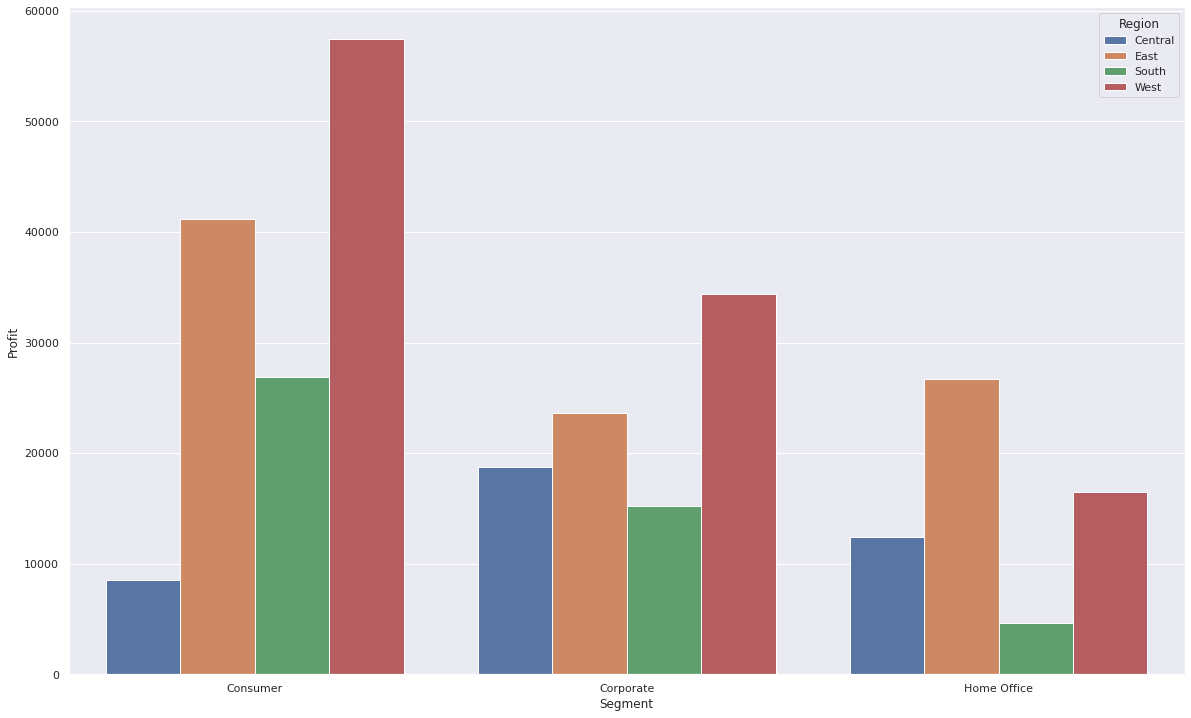

In [88]:
sns.set(rc={'figure.figsize':(20,12.27)})
sns.barplot(x='Segment',y='Profit',hue='Region',data=sum_df_rse)

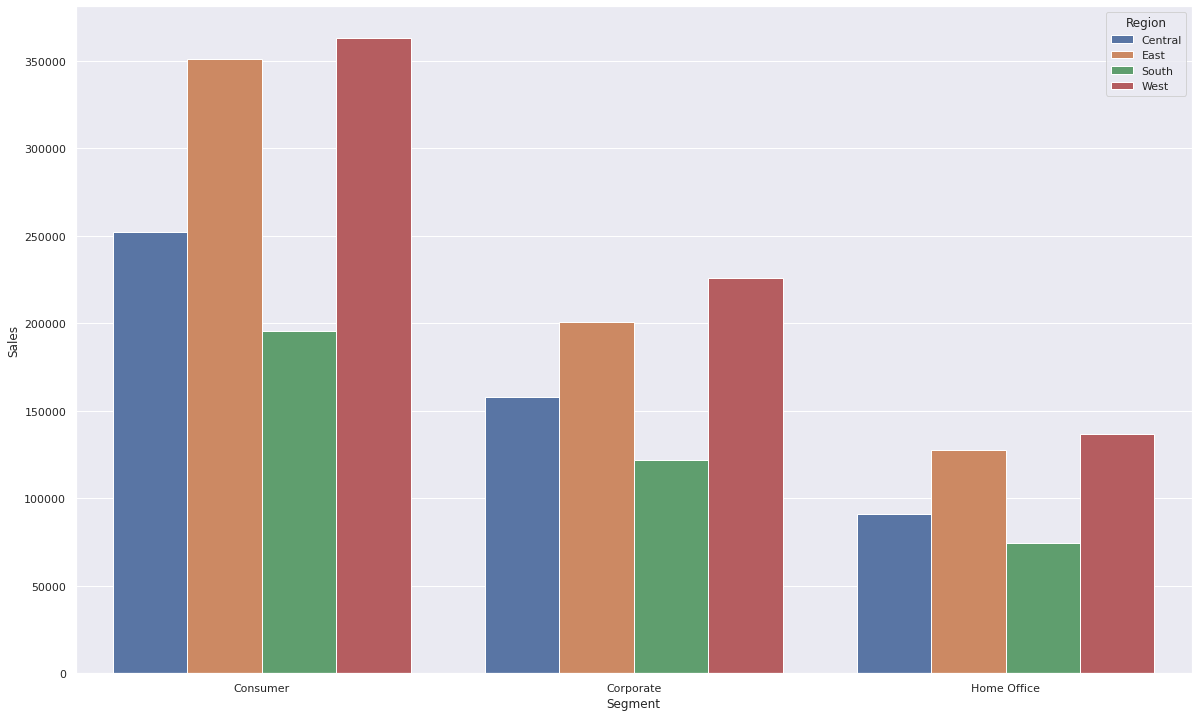

In [89]:
sns.barplot(x='Segment',y='Sales',hue='Region',data=sum_df_rse)

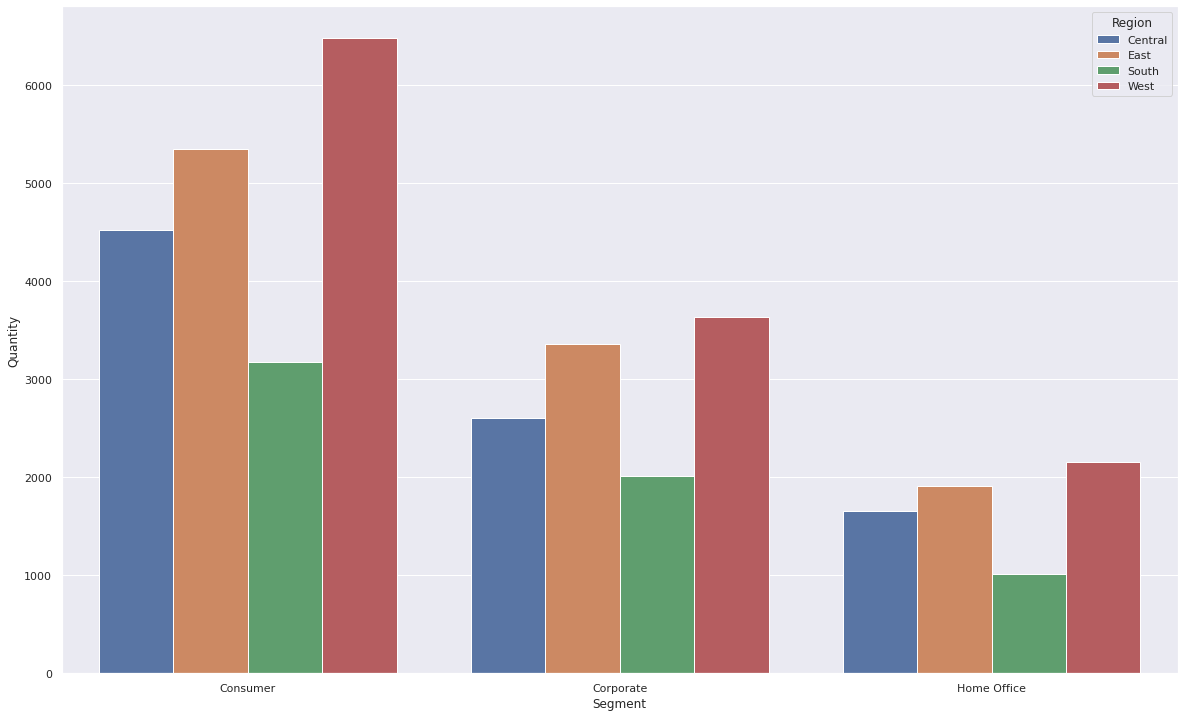

In [90]:
sns.barplot(x='Segment',y='Quantity',hue='Region',data=sum_df_rse)

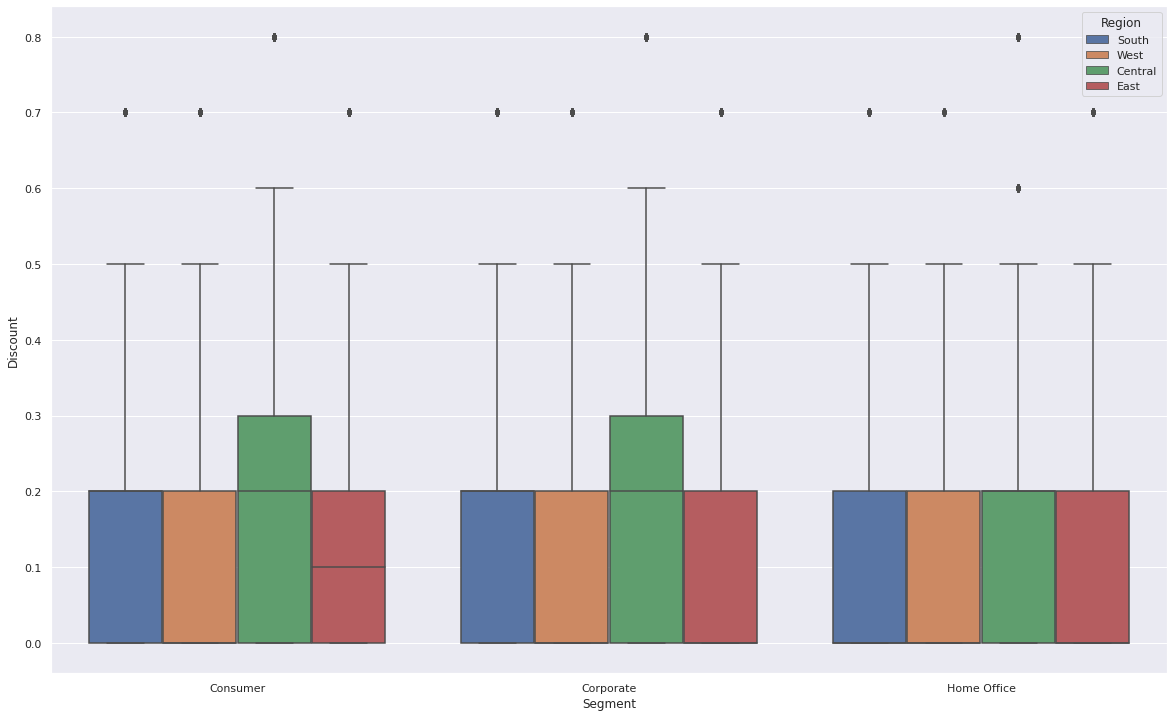

In [91]:
sns.boxplot(x='Segment',y='Discount',hue='Region',data=superstore)

### Ship Mode and Subcategory analysis

In [92]:
sum_df_ssc = superstore.groupby(['Ship Mode','Sub-Category']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})

In [93]:
sum_df_ssc['Ship Mode']=sum_df_ssc.index.get_level_values(0)
sum_df_ssc['Sub-Category']=sum_df_ssc.index.get_level_values(1)
(x,y)=sum_df_ssc.shape
ssc_index=[]
for i in range(0,x):
  ssc_index.append(i)
sum_df_ssc.index=ssc_index

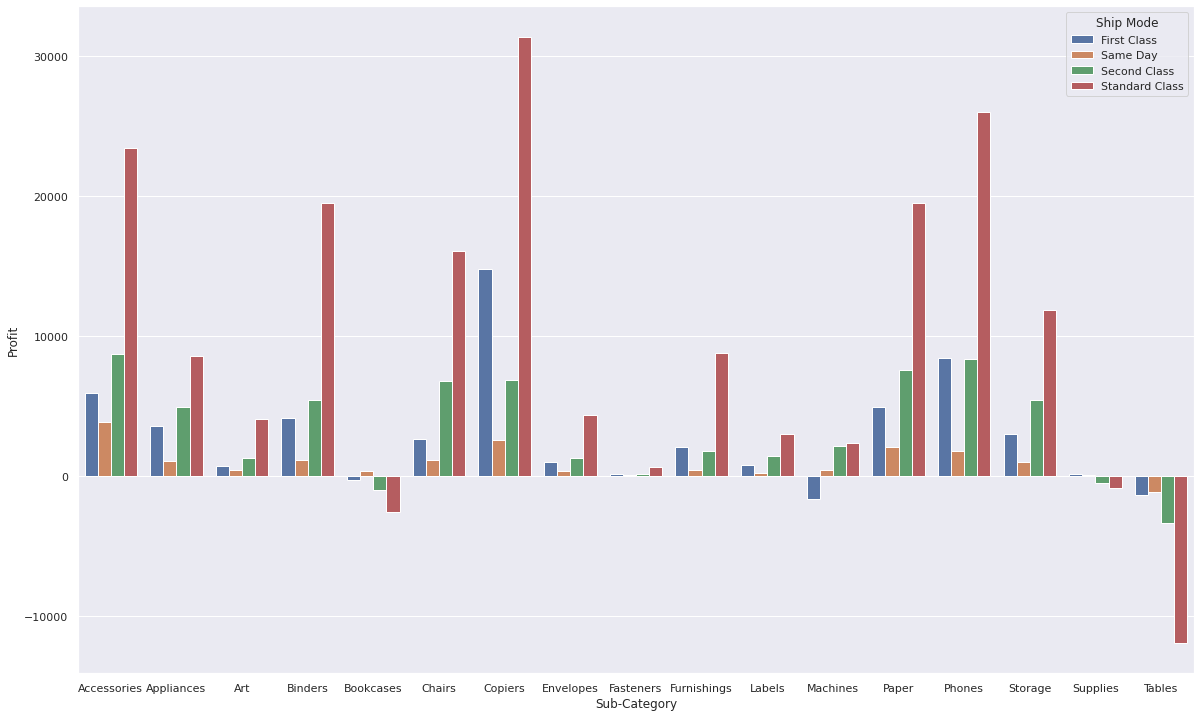

In [94]:
sns.set(rc={'figure.figsize':(20,12.27)})
sns.barplot(x='Sub-Category',y='Profit',hue='Ship Mode',data=sum_df_ssc)

Losses First day: bookcases, machines. Tables

Same day: tables

Second:bookcases, supplies, tables

Standard: bookcases, supplies, tables

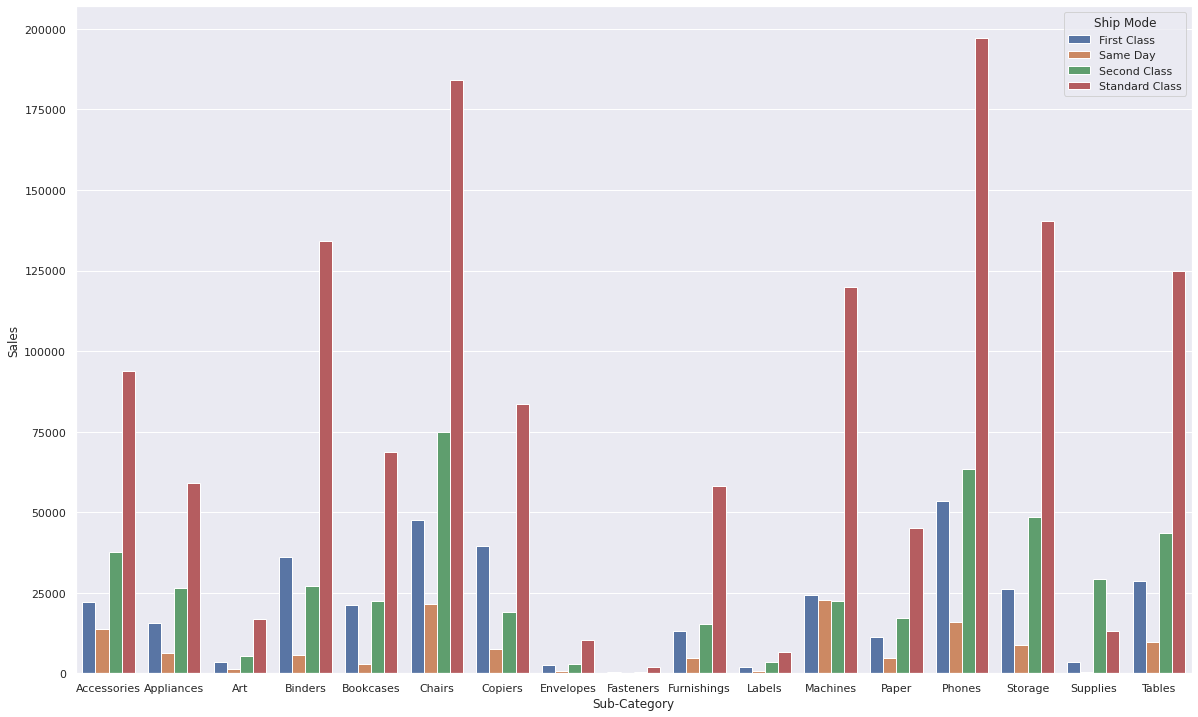

In [95]:
sns.barplot(x='Sub-Category',y='Sales',hue='Ship Mode',data=sum_df_ssc)

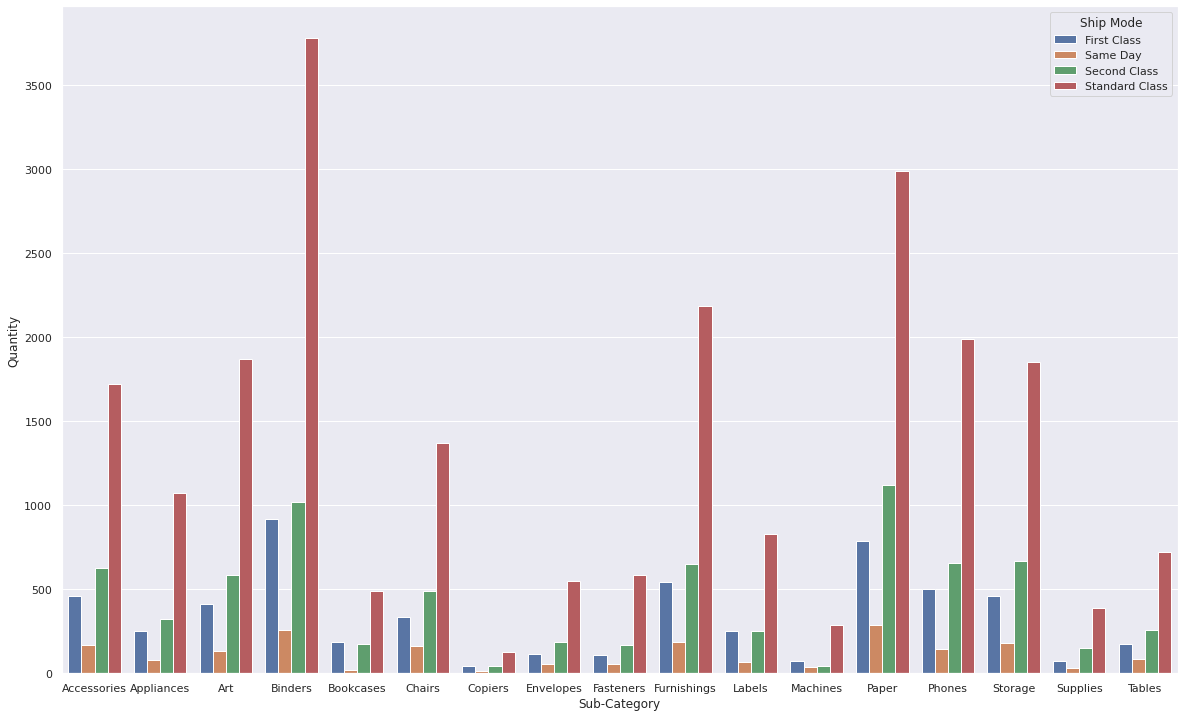

In [96]:
sns.barplot(x='Sub-Category',y='Quantity',hue='Ship Mode',data=sum_df_ssc)

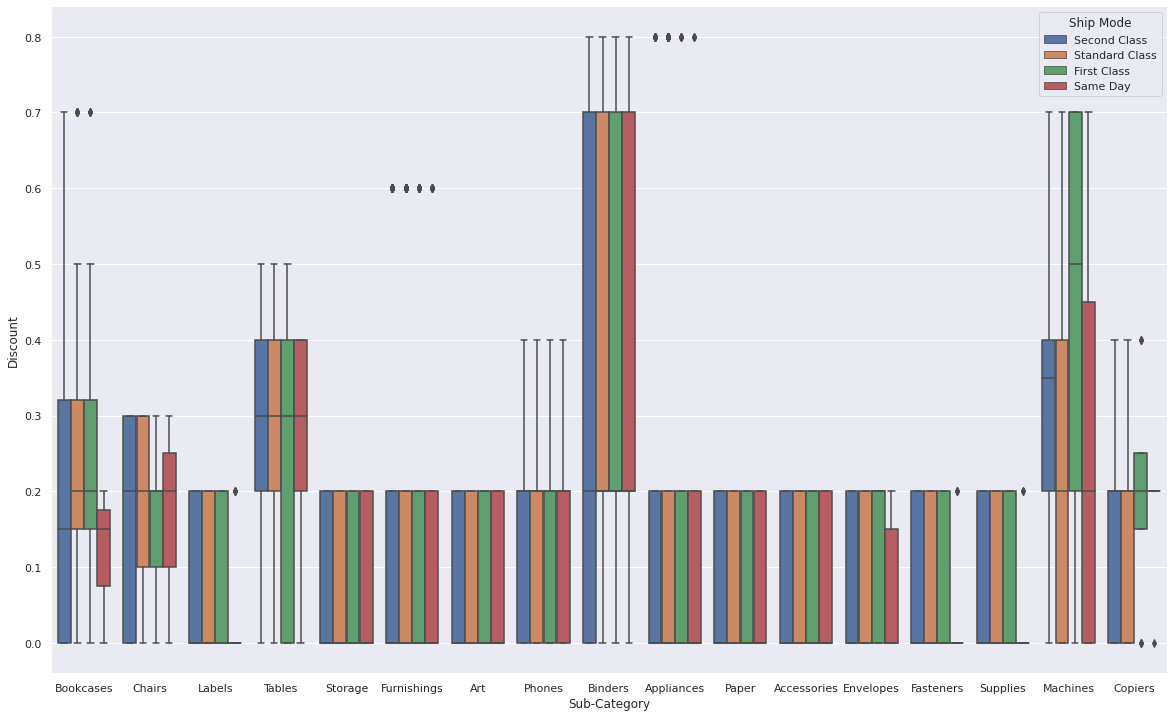

In [97]:
sns.boxplot(x='Sub-Category',y='Discount',hue='Ship Mode',data=superstore)

### Sub Category and Segment analysis

In [98]:
sum_df_scse = superstore.groupby(['Sub-Category','Segment']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})

In [99]:
sum_df_scse['Sub-Category']=sum_df_scse.index.get_level_values(0)
sum_df_scse['Segment']=sum_df_scse.index.get_level_values(1)
(x,y)=sum_df_scse.shape
scse_index=[]
for i in range(0,x):
  scse_index.append(i)
sum_df_scse.index=scse_index

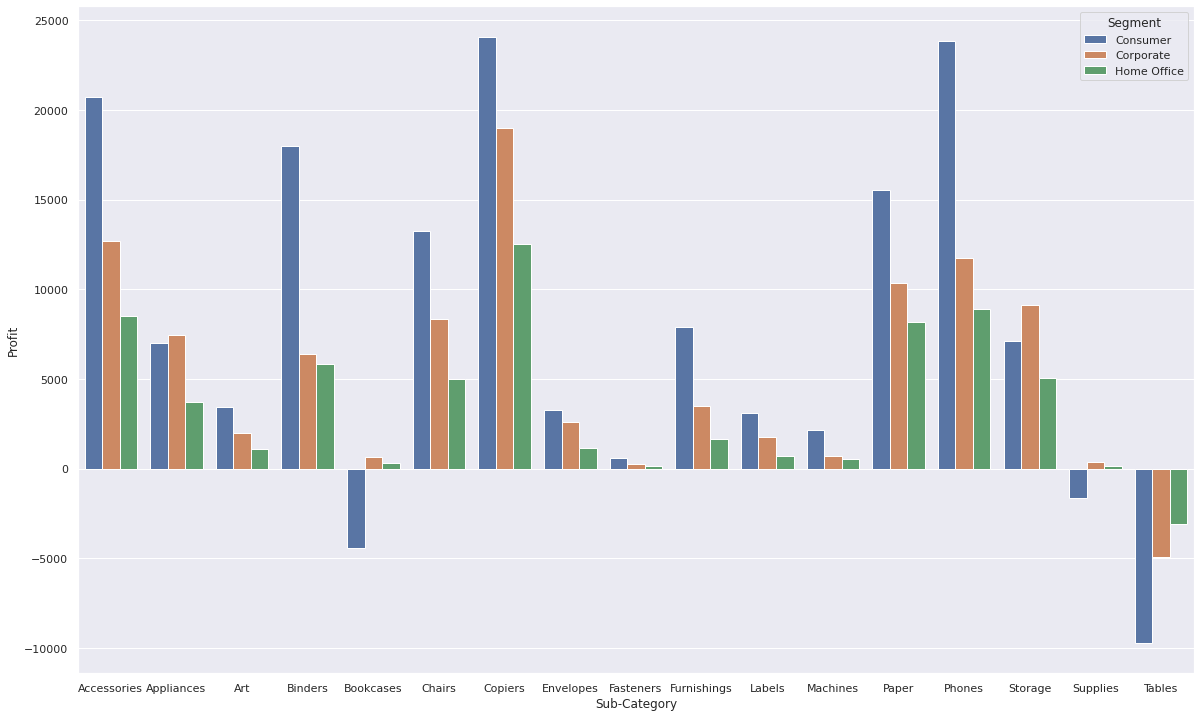

In [100]:
sns.set(rc={'figure.figsize':(20,12.27)})
sns.barplot(x='Sub-Category',y='Profit',hue='Segment',data=sum_df_scse)

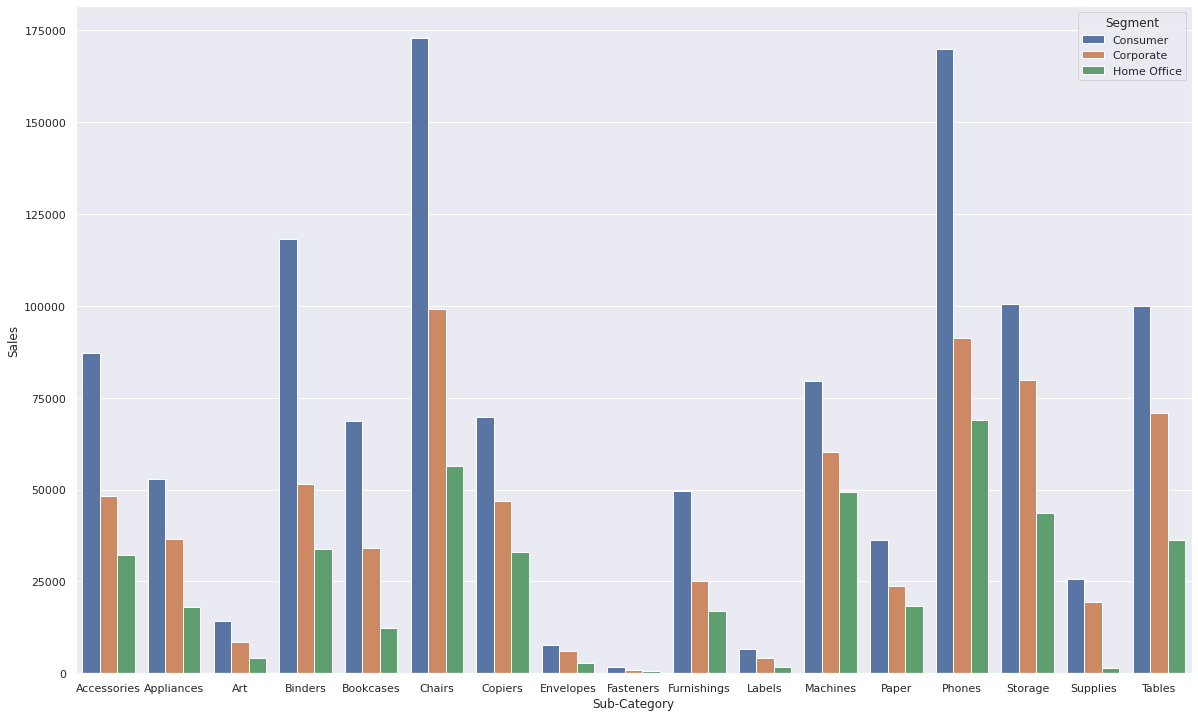

In [101]:
sns.barplot(x='Sub-Category',y='Sales',hue='Segment',data=sum_df_scse)

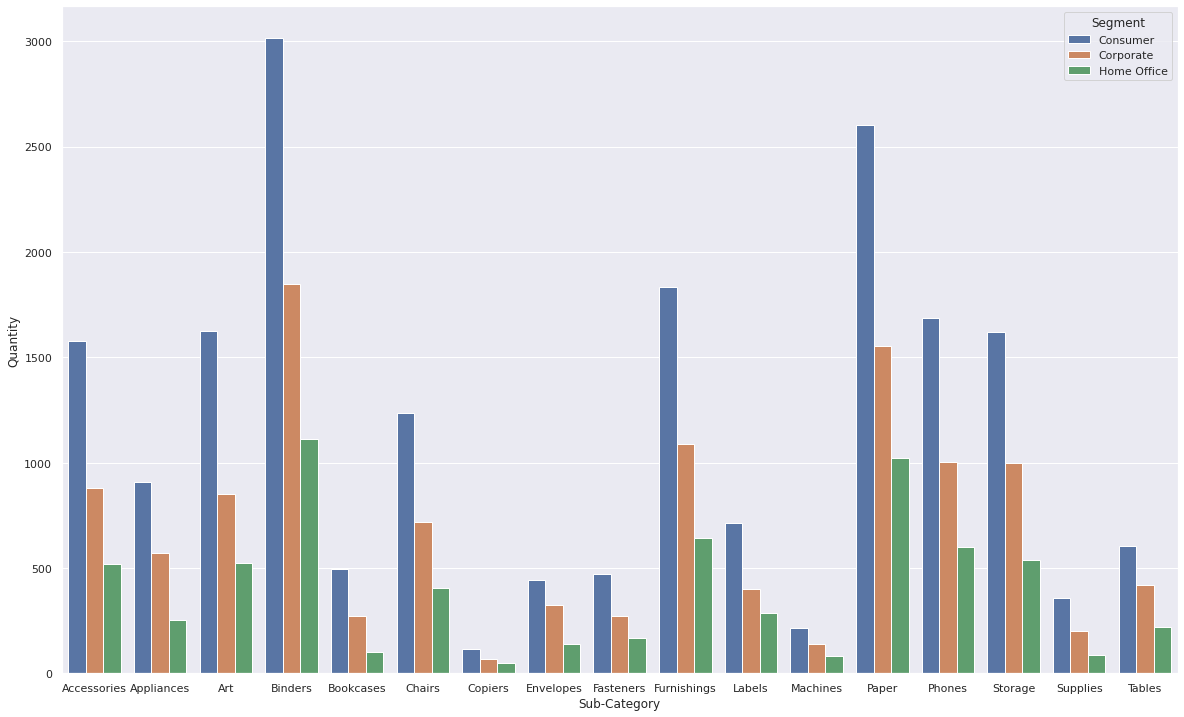

In [102]:
sns.barplot(x='Sub-Category',y='Quantity',hue='Segment',data=sum_df_scse)

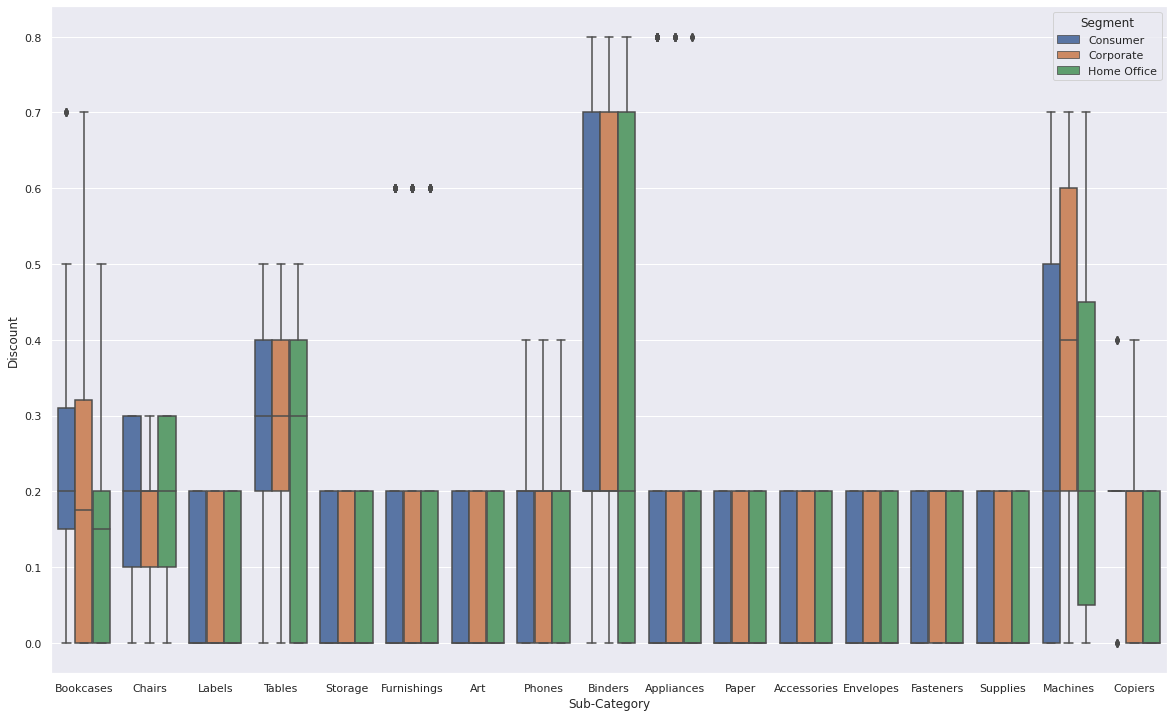

In [103]:
sns.boxplot(hue='Segment',y='Discount',x='Sub-Category',data=superstore)

### Ship Mode and Segment analysis

In [104]:
sum_df_smsc = superstore.groupby(['Ship Mode','Segment']).agg({'Profit': 'sum', 'Sales': 'sum','Quantity': 'sum'})

In [105]:
sum_df_smsc['Ship Mode']=sum_df_smsc.index.get_level_values(0)
sum_df_smsc['Segment']=sum_df_smsc.index.get_level_values(1)
(x,y)=sum_df_smsc.shape
smsc_index=[]
for i in range(0,x):
  smsc_index.append(i)
sum_df_smsc.index=smsc_index

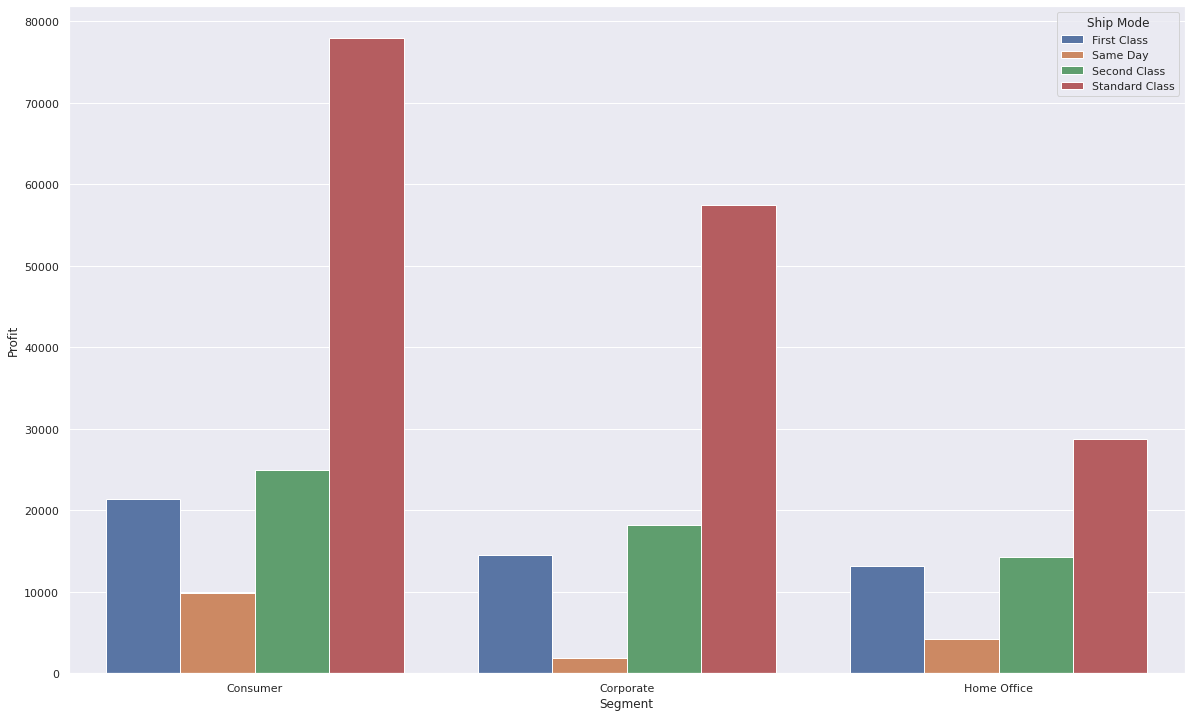

In [106]:
sns.set(rc={'figure.figsize':(20,12.27)})
sns.barplot(x='Segment',y='Profit',hue='Ship Mode',data=sum_df_smsc)

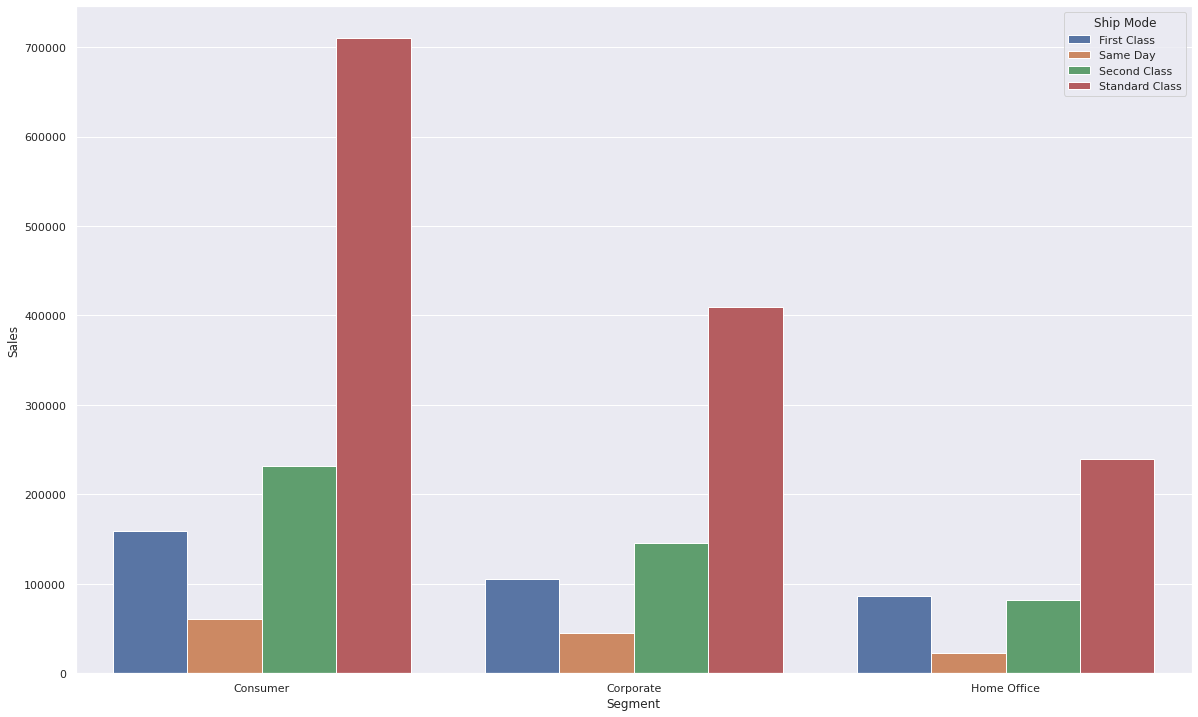

In [107]:
sns.barplot(x='Segment',y='Sales',hue='Ship Mode',data=sum_df_smsc)

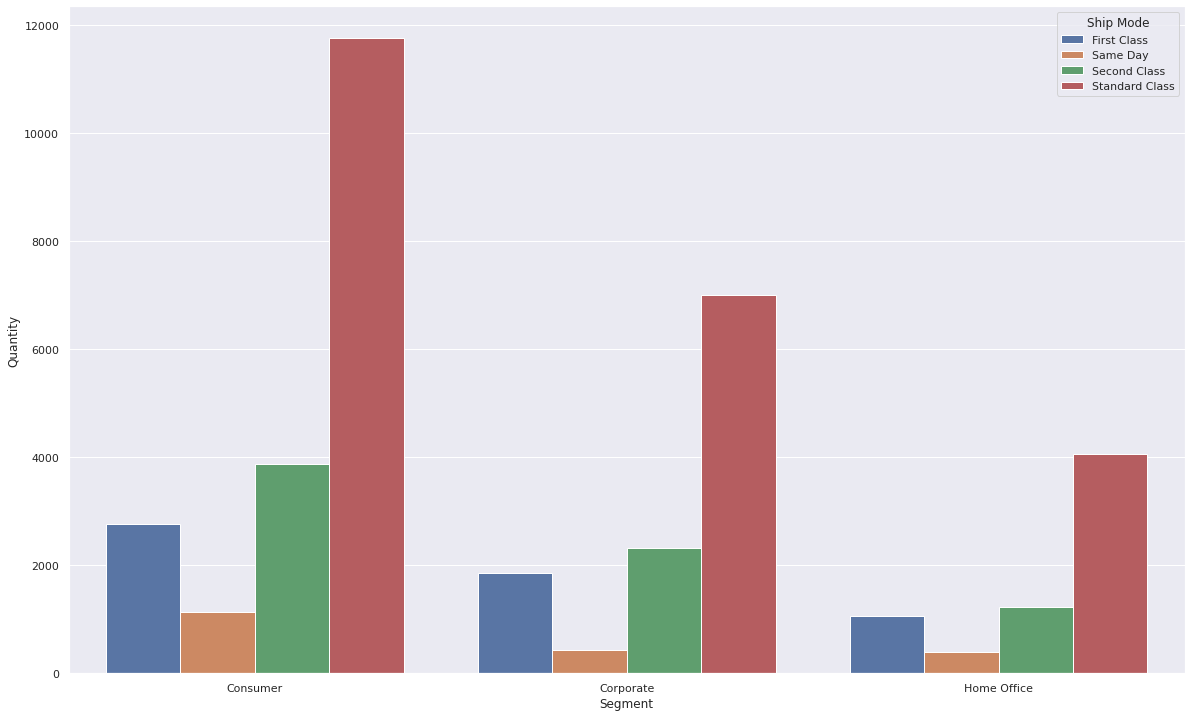

In [108]:
sns.barplot(x='Segment',y='Quantity',hue='Ship Mode',data=sum_df_smsc)

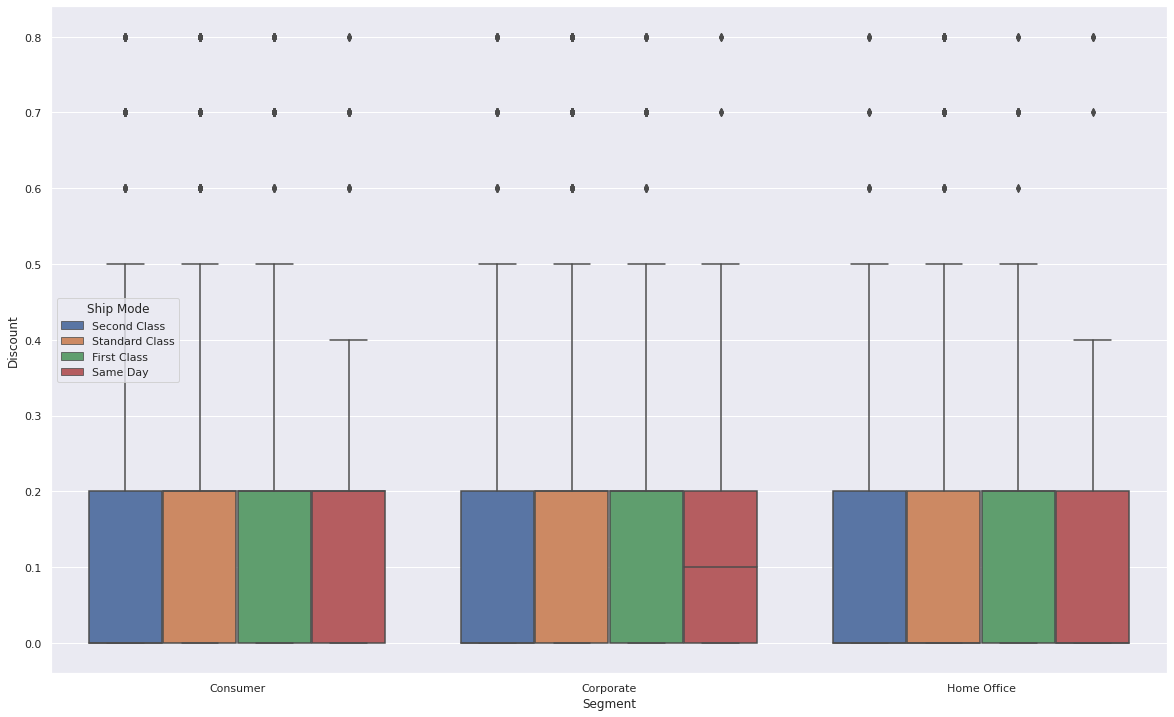

In [109]:
sns.boxplot(x='Segment',y='Discount',hue='Ship Mode',data=superstore)

## State wise analysis

Just write the name of state and you can see the plots of profit, sales among various segment,ship mode, sub category

In [110]:
def state_analysis(state_name):
  state_df=superstore.loc[superstore['State'] == state_name]
  state_smsc=state_df.groupby(['Ship Mode','Sub-Category']).agg({'Profit': 'sum', 'Sales': 'sum'})
  state_smsc['Ship Mode']=state_smsc.index.get_level_values(0)
  state_smsc['Sub-Category']=state_smsc.index.get_level_values(1)
  (x,y)=state_smsc.shape
  smsc_index=[]
  for i in range(0,x):
    smsc_index.append(i)
  state_smsc.index=smsc_index
  sns.barplot(x='Sub-Category',y='Profit',hue='Ship Mode',data=state_smsc)
  plt.show()
  sns.barplot(x='Sub-Category',y='Sales',hue='Ship Mode',data=state_smsc)
  plt.show()
  ################
  state_sesc=state_df.groupby(['Segment','Sub-Category']).agg({'Profit': 'sum', 'Sales': 'sum'})
  state_sesc['Segment']=state_sesc.index.get_level_values(0)
  state_sesc['Sub-Category']=state_sesc.index.get_level_values(1)
  (x,y)=state_sesc.shape
  sesc_index=[]
  for i in range(0,x):
    sesc_index.append(i)
  state_sesc.index=sesc_index
  sns.barplot(x='Sub-Category',y='Profit',hue='Segment',data=state_sesc)
  plt.show()
  sns.barplot(x='Sub-Category',y='Sales',hue='Segment',data=state_sesc)
  plt.show()

In [111]:
superstore['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

### Kentucky analysis

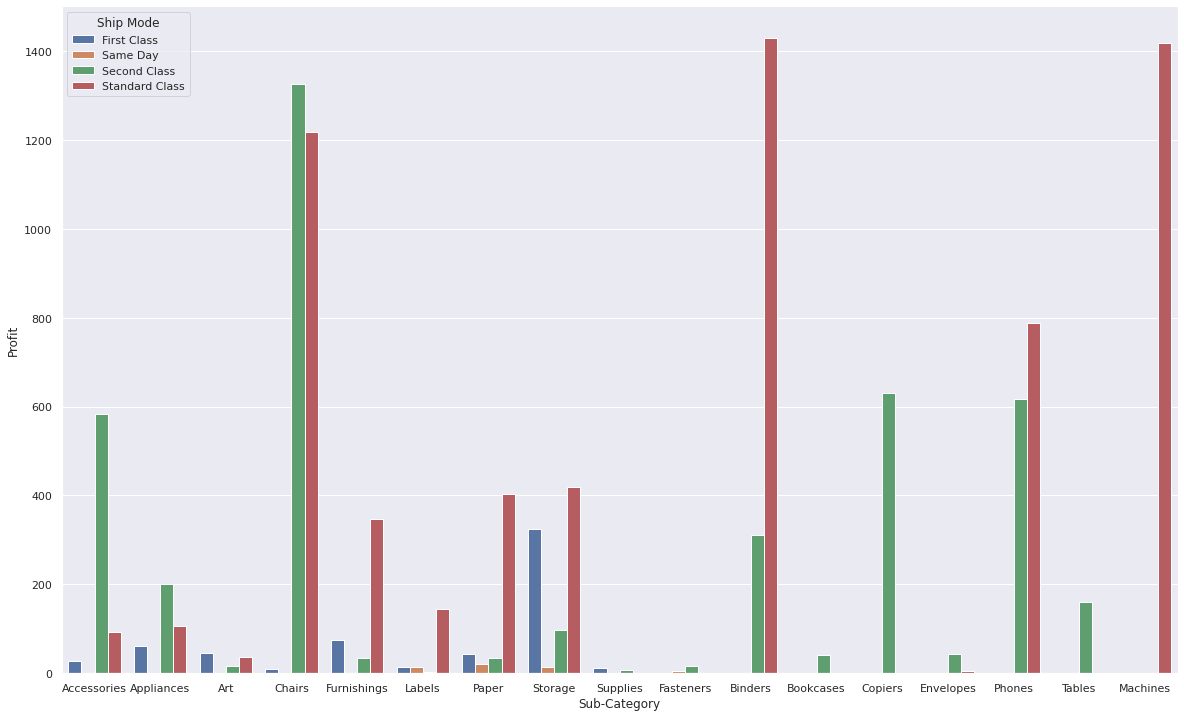

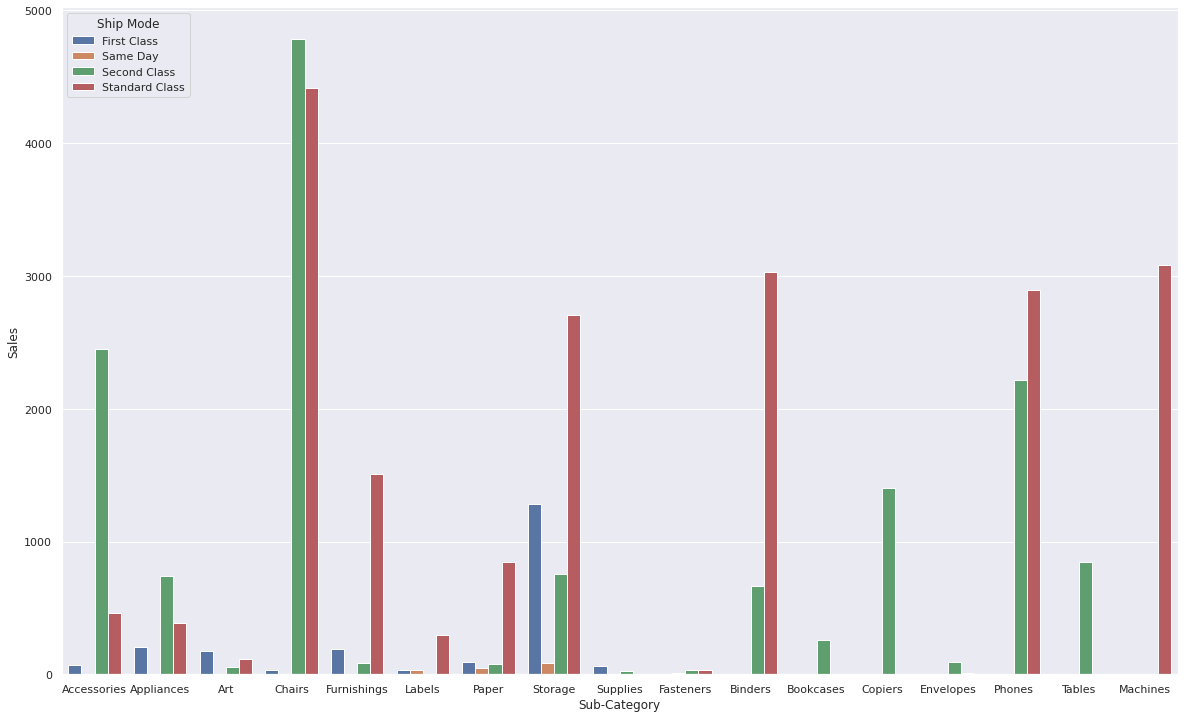

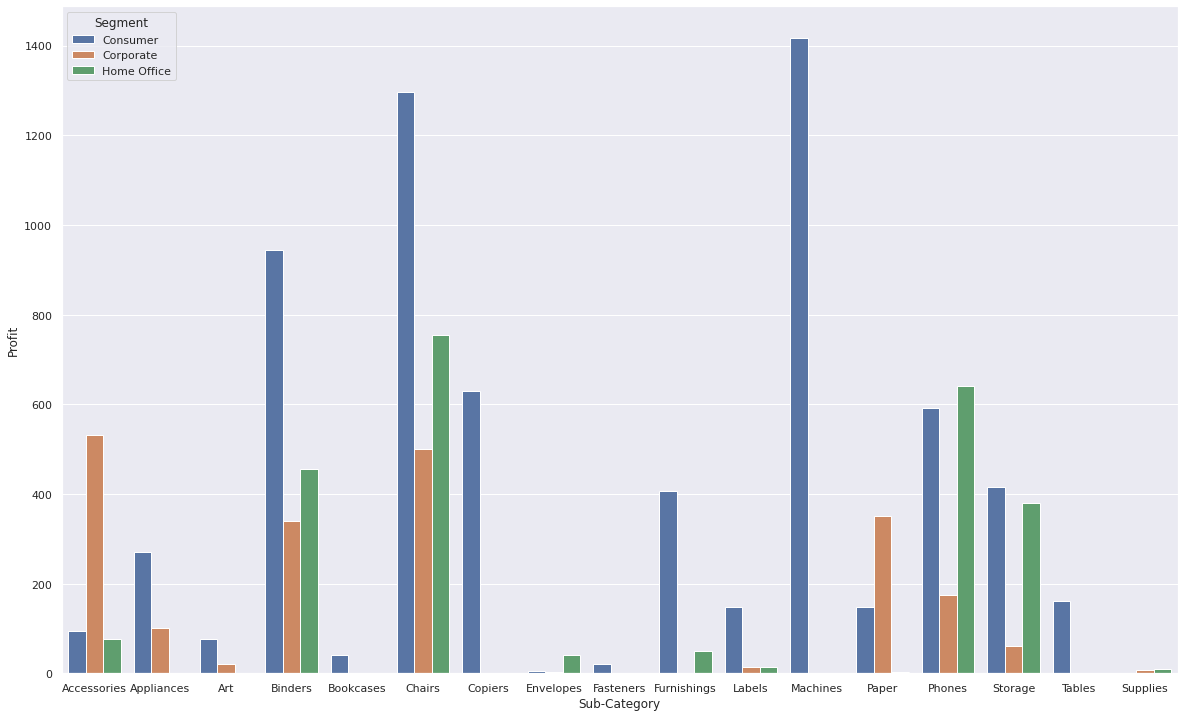

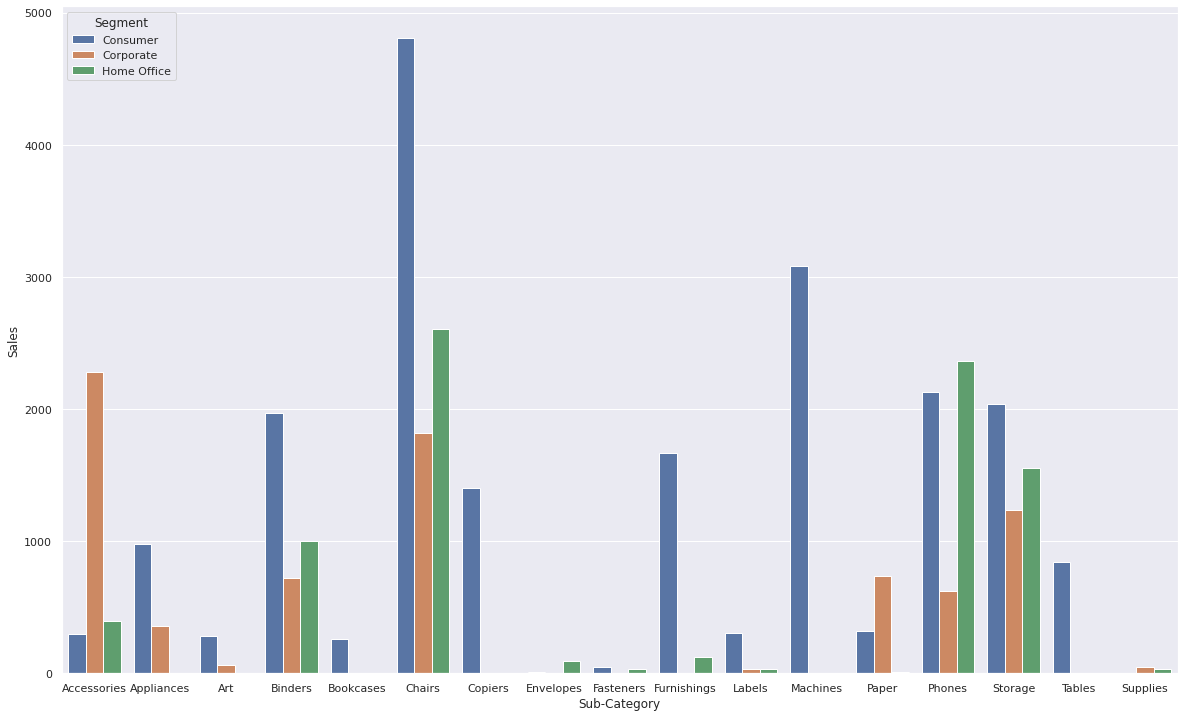

In [112]:
state_analysis('Kentucky')